In [250]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
re_data = pd.read_csv('data/Ames_Real_Estate_Data.csv')
housing = pd.read_csv('data/Ames_Housing_Price_Data.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [268]:
re_data

MapRefNo    GeoRefNo  Tier  Range                 Prop_Addr ZngCdPr  \
0       520400001   520400001     0      0  4599 GEORGE W CARVER AVE   FS-RL   
1       520440010   520440010     0      0         4507 EVEREST  AVE   FS-RL   
2       520440020   520440020     0      0         4513 EVEREST  AVE   FS-RL   
3       520445001   520445001     0      0          3449 BARCELOS ST   FS-RL   
4       520445010   520445010     0      0         4506 EVEREST  AVE   FS-RL   
...           ...         ...   ...    ...                       ...     ...   
22208  1018100010  1018100010     0      0           2400 SE 16TH ST     HOC   
22209  1018100025  1018100025     0      0           2500 SE 16TH ST     HOC   
22210  1018100035  1018100035     0      0           2600 SE 16TH ST     HOC   
22211  1018100040  1018100040     0      0        2423 US HIGHWAY 30     HOC   
22212  1018100150  1018100150     0      0          1820 S DAYTON PL     HOC   

      ZngCdSc ZngOLPr ZngOLSc    ClassPr_S  ... PA-Nmbr PA-PreD  \
0         NaN     NaN     NaN  RESIDENTIAL  ...    4599     NaN   
1         NaN     NaN     NaN  RESIDENTIAL  ...    4507     NaN   
2         NaN     NaN     NaN  RESIDENTIAL  ...    4513     NaN   
3         NaN     NaN     NaN  RESIDENTIAL  ...    3449     NaN   
4         NaN     NaN     NaN  RESIDENTIAL  ...    4506     NaN   
...       ...     ...     ...          ...  ...     ...     ...   
22208     NaN   O-GSE     NaN   COMMERCIAL  ...    2400      SE   
22209     NaN     NaN     NaN   COMMERCIAL  ...    2500      SE   
22210     NaN     NaN     NaN   COMMERCIAL  ...    2600      SE   
22211     NaN     NaN     NaN   COMMERCIAL  ...    2423     NaN   
22212     NaN   O-GSE     NaN   COMMERCIAL  ...    1820       S   

               PA-Strt  PA-StSfx PA-PostD PA-UnTyp PA-UntNo       Date  \
0      GEORGE W CARVER       AVE      NaN      NaN      NaN  10-Jul-20   
1              EVEREST       AVE      NaN      NaN      NaN  10-Jul-20   
2              EVEREST       AVE      NaN      NaN      NaN  10-Jul-20   
3             BARCELOS        ST      NaN      NaN      NaN  10-Jul-20   
4              EVEREST       AVE      NaN      NaN      NaN  10-Jul-20   
...                ...       ...      ...      ...      ...        ...   
22208             16TH        ST      NaN      NaN      NaN  10-Jul-20   
22209             16TH        ST      NaN      NaN      NaN  10-Jul-20   
22210             16TH        ST      NaN      NaN      NaN  10-Jul-20   
22211    US HIGHWAY 30       NaN      NaN      NaN      NaN  10-Jul-20   
22212           DAYTON        PL      NaN      NaN      NaN  10-Jul-20   

                   Source NmbrBRs  
0      Ames City Assessor     NaN  
1      Ames City Assessor     NaN  
2      Ames City Assessor     NaN  
3      Ames City Assessor     NaN  
4      Ames City Assessor     NaN  
...                   ...     ...  
22208  Ames City Assessor     NaN  
22209  Ames City Assessor     NaN  
22210  Ames City Assessor     NaN  
22211  Ames City Assessor     NaN  
22212  Ames City Assessor     NaN  

[22213 rows x 91 columns]

In [269]:
housing.drop_duplicates()
housing['GrLivArea']

0        856
1       1049
2       1001
3       1039
4       1665
        ... 
2575     952
2576    1733
2577    2002
2578    1842
2579    1911
Name: GrLivArea, Length: 2580, dtype: int64

In [261]:
both = pd.merge(housing,re_data,left_on='PID',right_on='MapRefNo')
both['SpSf'] = both['SalePrice_x'] / both['GrLivArea']
both

Unnamed: 0        PID  GrLivArea  SalePrice_x  MSSubClass MSZoning  \
0              1  909176150        856       126000          30       RL   
1              2  905476230       1049       139500         120       RL   
2              2  905476230       1049       139500         120       RL   
3              3  911128020       1001       124900          30  C (all)   
4              4  535377150       1039       114000          70       RL   
...          ...        ...        ...          ...         ...      ...   
2598         759  903205040        952       121000          30       RL   
2599         760  905402060       1733       139600          20       RL   
2600         761  909275030       2002       145000          90       RH   
2601         762  907192040       1842       217500          60       RL   
2602         763  906223180       1911       215000          60       RL   

      LotFrontage  LotArea_x Street Alley  ... PA-PreD    PA-Strt PA-StSfx  \
0             NaN       7890   Pave   NaN  ...     NaN    HAYWARD      AVE   
1            42.0       4235   Pave   NaN  ...     NaN       WEST       ST   
2            42.0       4235   Pave   NaN  ...     NaN       WEST       ST   
3            60.0       6060   Pave   NaN  ...       S        2ND       ST   
4            80.0       8146   Pave   NaN  ...     NaN    DOUGLAS      AVE   
...           ...        ...    ...   ...  ...     ...        ...      ...   
2598          NaN       8854   Pave   NaN  ...     NaN  RIDGEWOOD      AVE   
2599          NaN      13680   Pave   NaN  ...     NaN       MARY      CIR   
2600         82.0       6270   Pave   NaN  ...     NaN     SUNSET       DR   
2601          NaN       8826   Pave   NaN  ...     NaN    CLEMENS     BLVD   
2602         80.0       9554   Pave   NaN  ...     NaN    VERMONT       CT   

     PA-PostD PA-UnTyp PA-UntNo       Date              Source NmbrBRs  \
0         NaN      NaN      NaN  10-Jul-20  Ames City Assessor     2.0   
1         NaN      NaN      NaN  10-Jul-20  Ames City Assessor     2.0   
2         NaN      NaN      NaN  10-Jul-20  Ames City Assessor     2.0   
3         NaN      NaN      NaN  10-Jul-20  Ames City Assessor     2.0   
4         NaN      NaN      NaN  10-Jul-20  Ames City Assessor     2.0   
...       ...      ...      ...        ...                 ...     ...   
2598      NaN      NaN      NaN  10-Jul-20  Ames City Assessor     2.0   
2599      NaN      NaN      NaN  10-Jul-20  Ames City Assessor     4.0   
2600      NaN      NaN     2142  10-Jul-20  Ames City Assessor     4.0   
2601      NaN      NaN      NaN  10-Jul-20  Ames City Assessor     3.0   
2602      NaN      NaN      NaN  10-Jul-20  Ames City Assessor     3.0   

            SpSf  
0     147.196262  
1     132.983794  
2     132.983794  
3     124.775225  
4     109.720885  
...          ...  
2598  127.100840  
2599   80.553953  
2600   72.427572  
2601  118.078176  
2602  112.506541  

[2603 rows x 174 columns]

In [262]:
pd.DataFrame(both.isnull().sum() / len(both)).sort_values(by=0,ascending=False)

0
X2TSc_S         1.0
X2TPr_S         1.0
X2TSc_D         1.0
MA_Line2        1.0
PA-PostD        1.0
...             ...
TotRmsAbvGrd_x  0.0
KitchenQual     0.0
KitchenAbvGr    0.0
BedroomAbvGr    0.0
SpSf            0.0

[174 rows x 1 columns]

In [247]:
categ = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','LotConfig','LandSlope','Neighborhood_x',\
         'Condition1','Condition2','BldgType_x', 'HouseStyle_x','RoofStyle','RoofMatl_x','Exterior1st','Exterior2nd','MasVnrType_x','ExterQual',\
         'ExterCond','Foundation_x','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating_x','HeatingQC','CentralAir','GarageType_x','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC',\
         'Electrical','KitchenQual','Functional','FireplaceQu','ZngCdPr','ZngOLPr','Fence','ClassPr_S','ClassSc_S','SchD_S','TxD_S',\
         'MA_City','MA_State','MA_Zip1','MA_Zip2','Inst1TPr','ValType','DwlgNo_S','BldgType_y','HouseStyle_y','Foundation_y','RoofMatl_y','Ext1','Ext2','MasVnrType_y','Heating_y','Central Air',\
        'GarageType_y','SaleType_y','SaleCond','ParclRel','MiscFeature','SaleType_x','SaleCondition']
nonlin = ['BsmtFullBath', 'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd_x','Fireplaces_x','Fireplaces_y','GarageCars','NmbrBRs','OverallQual' ,'OverallCond']
lin =['LotArea_x','BsmtFinSF1','TotRmsAbvGrd_y','MasVnrArea','TotalBsmtSF','1stFlrSF','GrLivArea','BsmtFinSF2','GLA','2ndFlrSF','BsmtUnfSF','LowQualFinSF','LotFrontage','GarageArea_x','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea_x','MiscVal','PoolArea_y']
date_tm = ['YearBuilt', 'YearRemodAdd','GarageYrBlt']
numers = nonlin + lin + date_tm

clean_X = both[categ+ordinal+nonlin+lin+date_tm]
x_numer = numers
y1 = both['SalePrice_x']
y2 = both['SpSf']

In [259]:
dropped_cols = list(set(both.columns) - set(clean_categ + clean_ordinal + clean_nonlin + clean_lin + clean_date_tm))
dropped_cols

['X2TSc_D',
 'X2TSc_S',
 'SpSf',
 'MoSold',
 'GarageArea_y',
 'PA-UntNo',
 'Range',
 'MA_Line1',
 'LndAcX1S',
 'YrSold',
 'PA-UnTyp',
 'Tier',
 'MoSold_MM',
 'ParType',
 'YrBuilt',
 'X1TPr_D',
 'MilVal_D',
 'Inst1_Yr',
 'Rcrd_Mo',
 'TtlBsmtSF',
 'Source',
 'PID',
 'Utilities',
 'PA-PreD',
 'X1TSc_S',
 'BldgNo_S',
 'PA-Strt',
 'ImpAcX2S',
 'MapRefNo',
 'X1TSc_D',
 'ImpAcX1S',
 'MA_Line2',
 'X1TPr_S',
 'ZngCdSc',
 'Cars',
 'ImpAc_S',
 'PA-PostD',
 'AcreGr',
 'Inst1_No',
 'AcreX_S1',
 'LotArea_y',
 'HSTtl_S',
 'SalePrice_x',
 'GeoRefNo',
 'Date',
 'MilVal_S',
 'Prop_Addr',
 'Rcrd_Yr',
 'AcreNt_S',
 'Inst1_Mo',
 'GarYrBlt',
 'Unnamed: 0',
 'ZngOLSc',
 'X2TPr_S',
 'PA-Nmbr',
 'TtlVal_AsrYr',
 'X2TPr_D',
 'MA_Ownr2',
 'Legal_Pr',
 'SalePrice_y',
 'Neighborhood_y',
 'HSTtl_D',
 'YrSold_YYYY',
 'OthAc_S',
 'PA-StSfx',
 'LndAc_S',
 'MA_Ownr1']

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


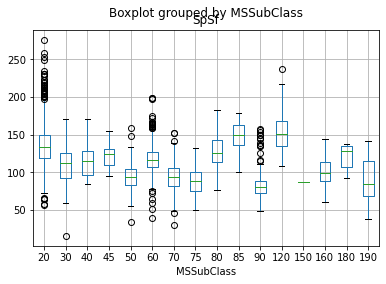

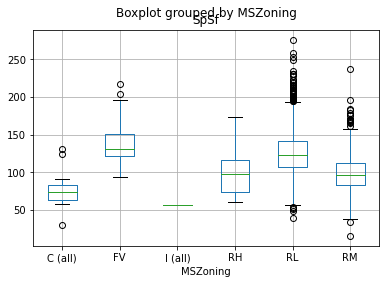

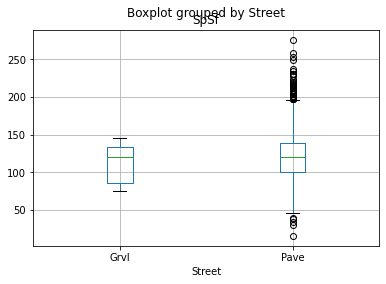

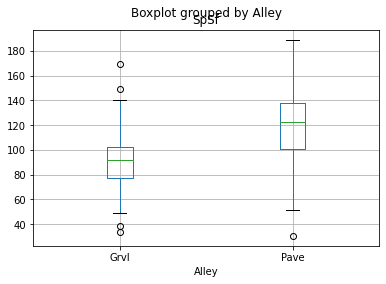

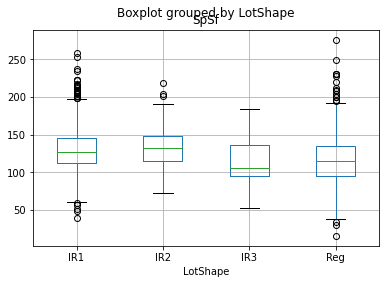

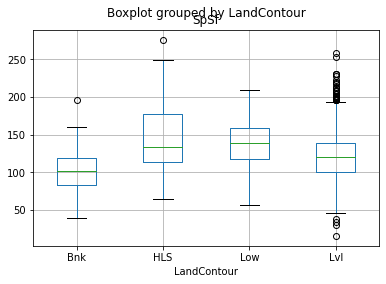

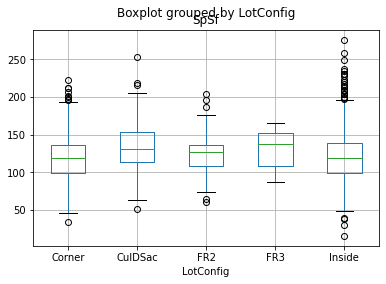

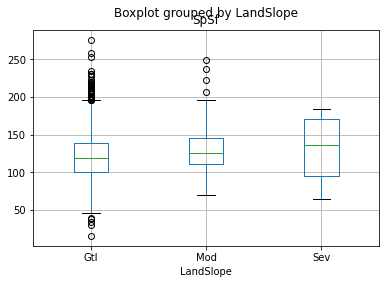

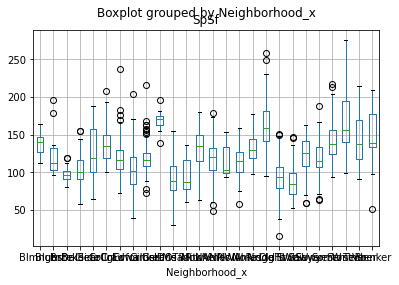

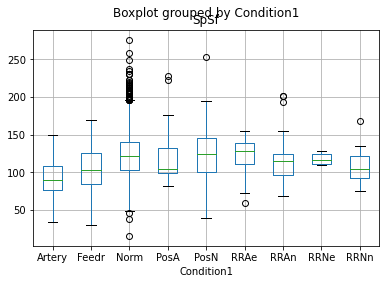

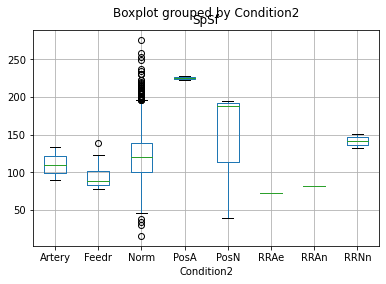

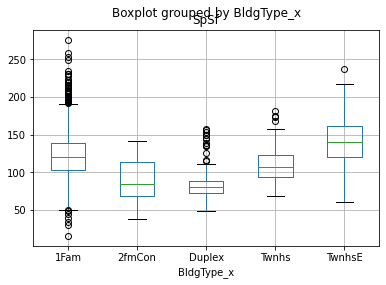

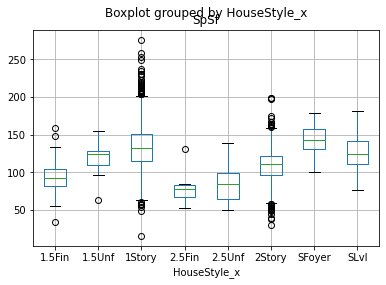

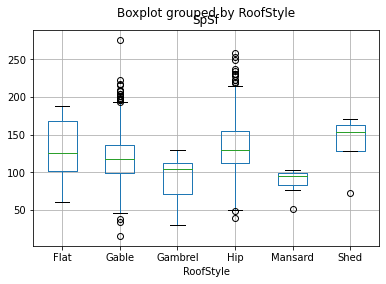

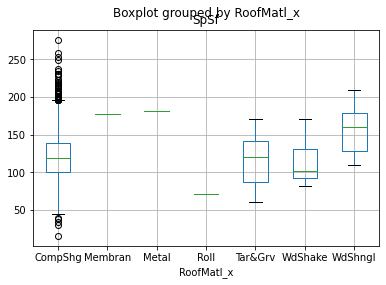

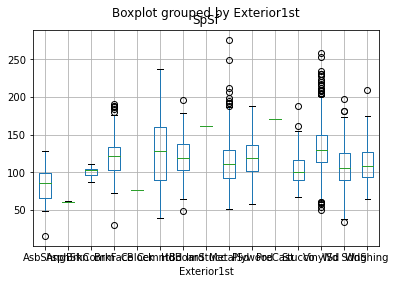

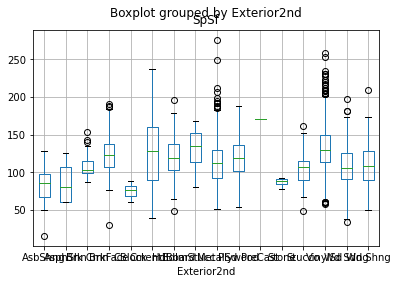

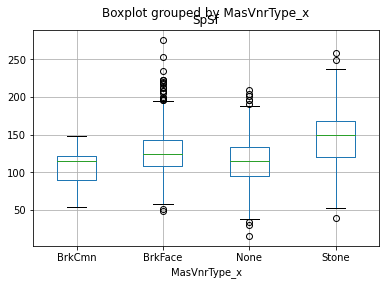

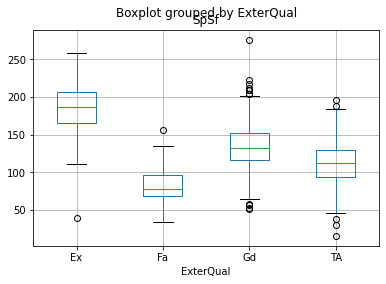

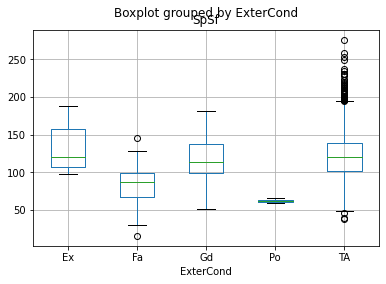

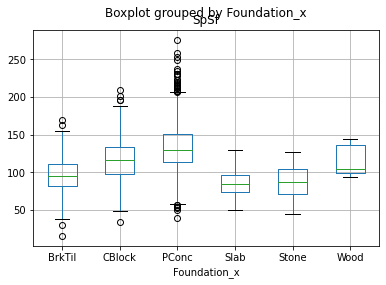

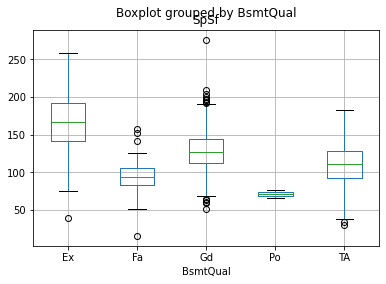

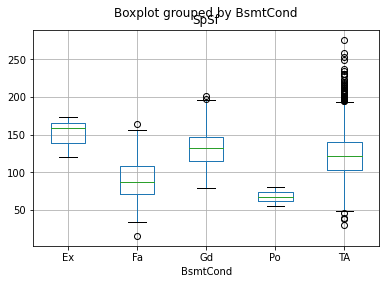

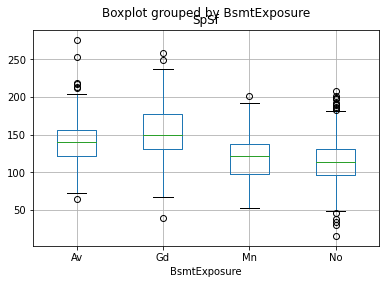

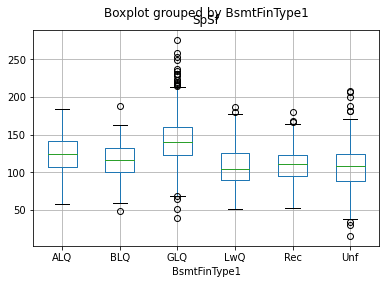

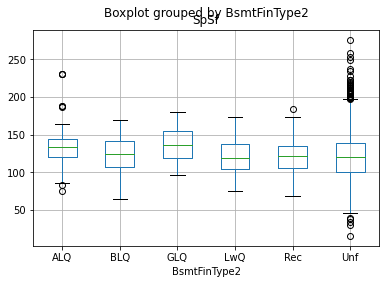

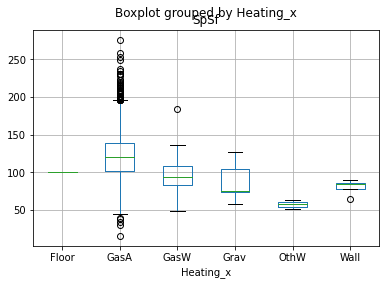

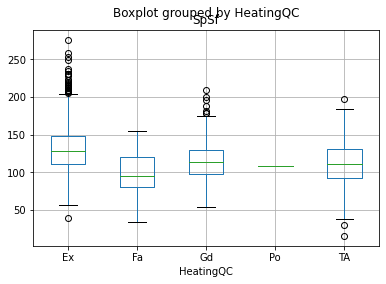

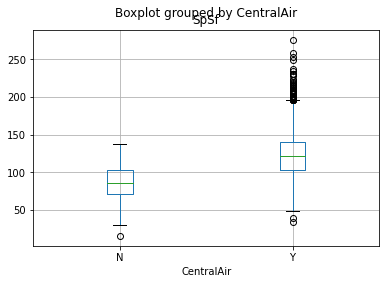

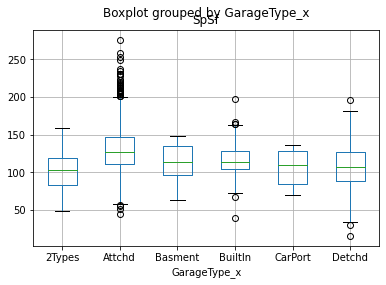

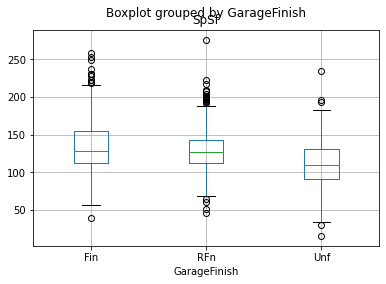

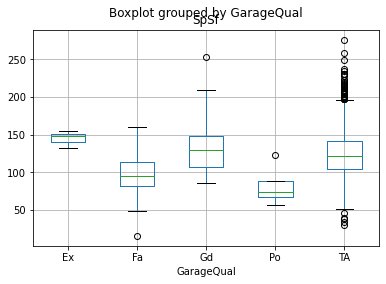

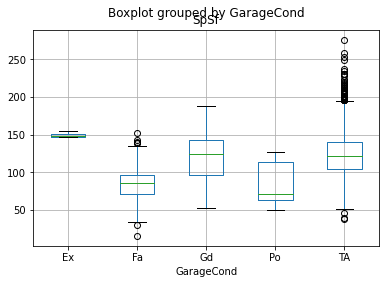

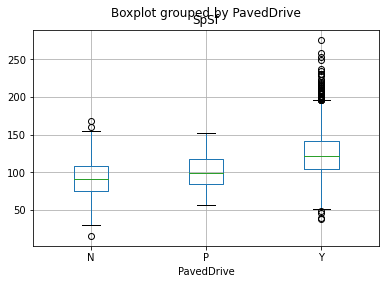

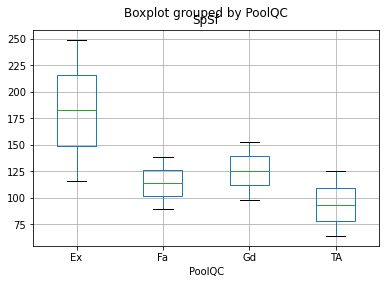

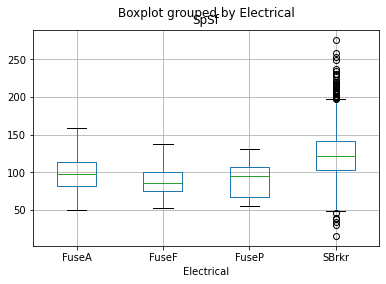

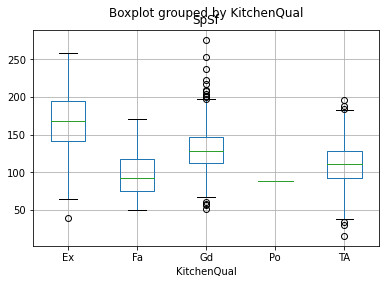

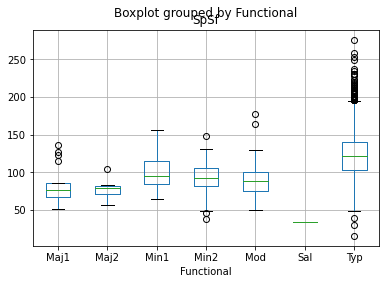

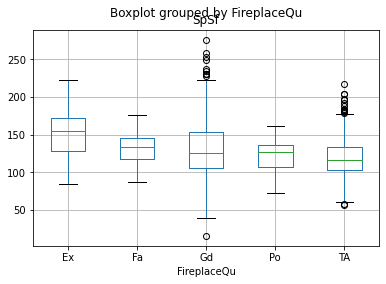

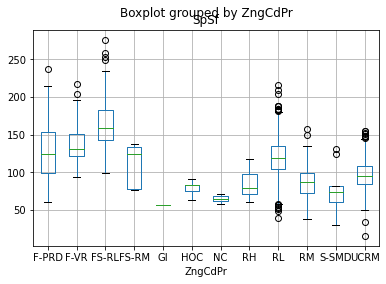

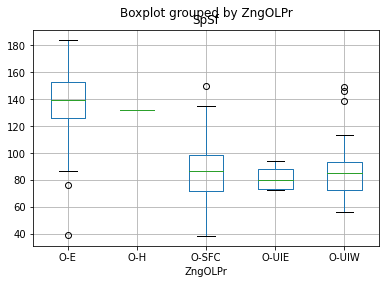

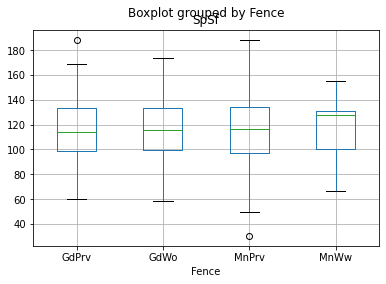

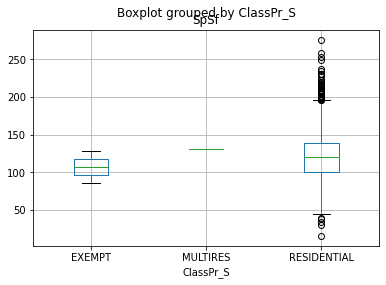

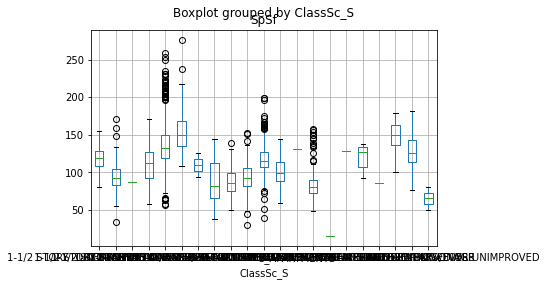

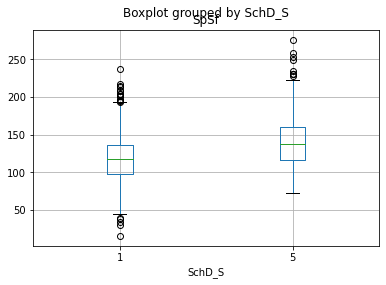

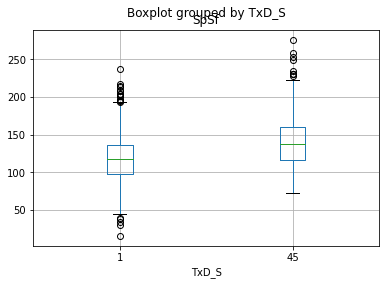

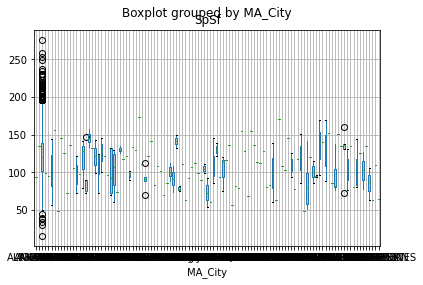

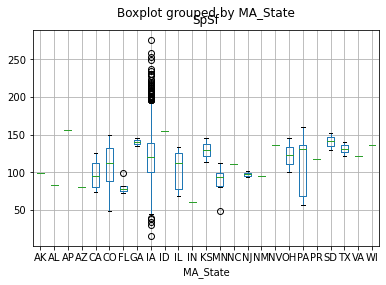

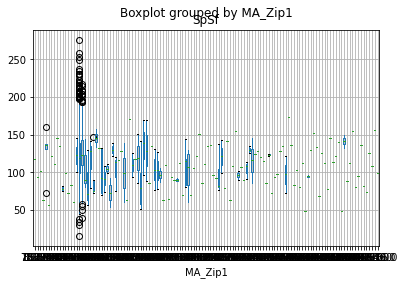

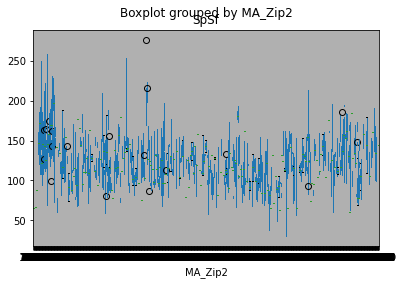

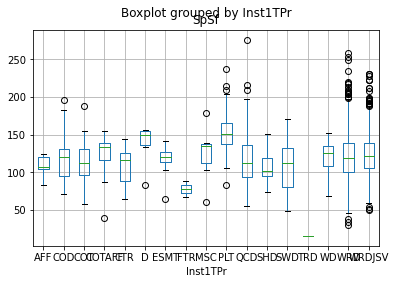

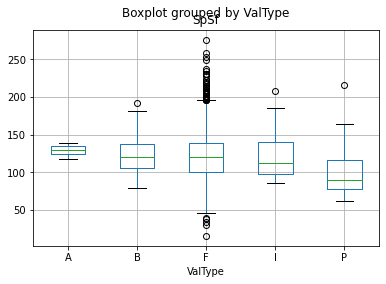

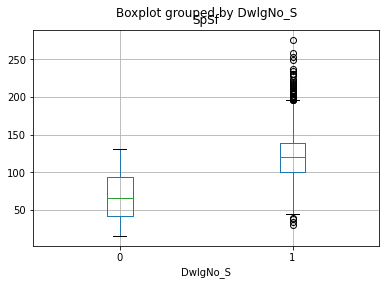

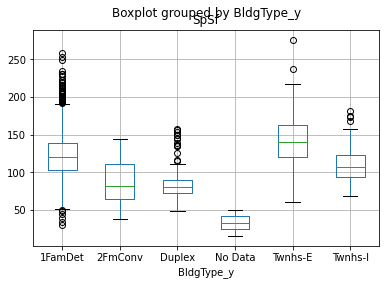

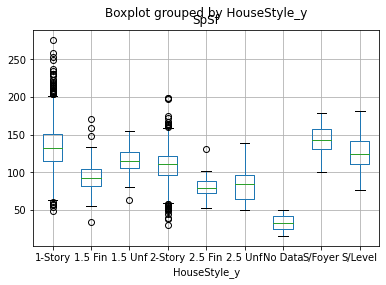

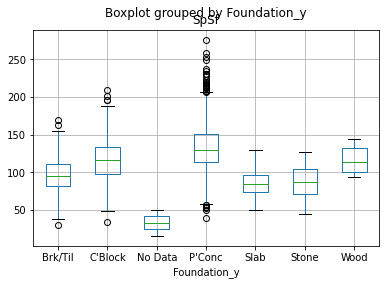

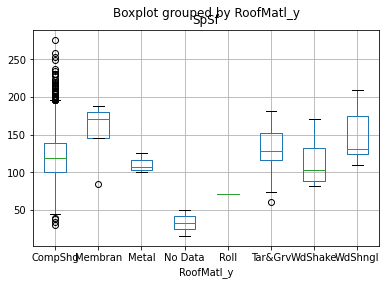

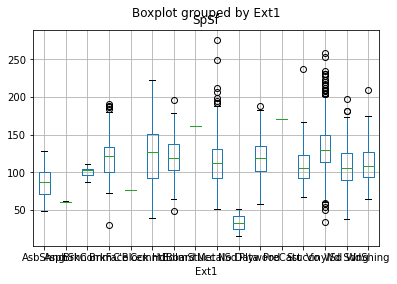

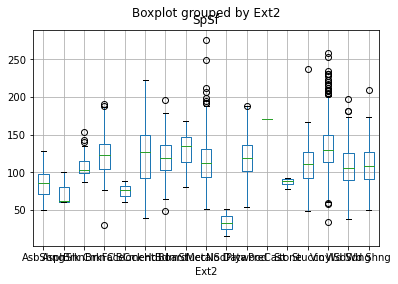

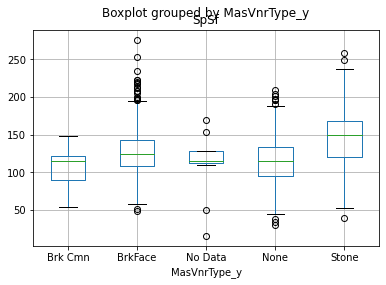

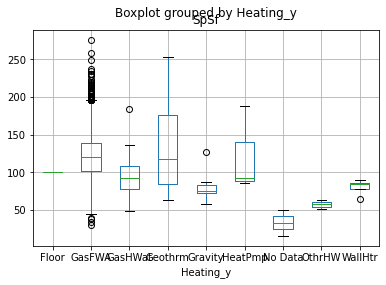

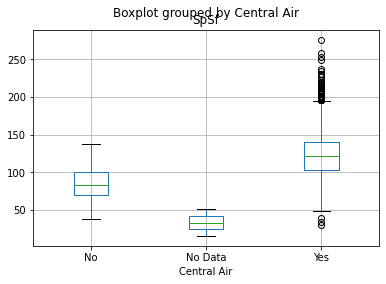

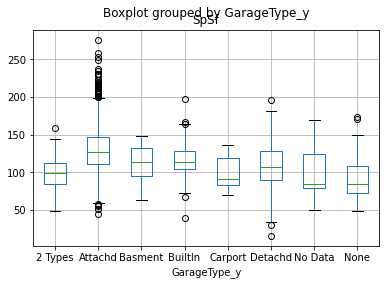

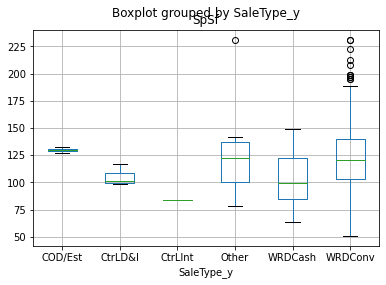

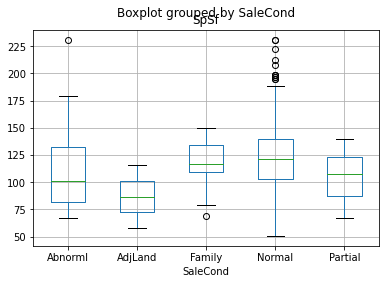

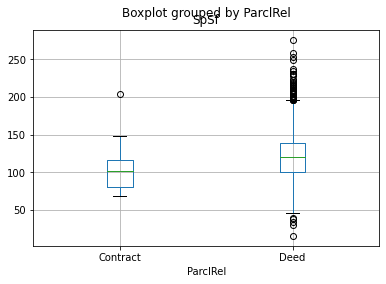

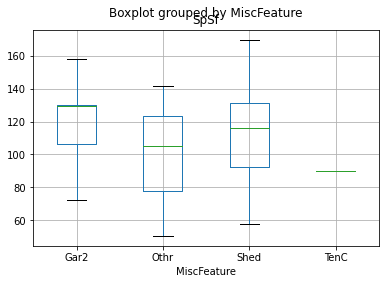

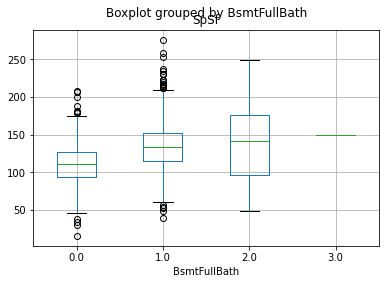

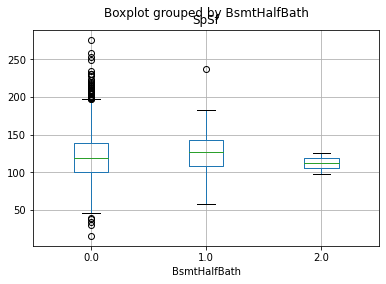

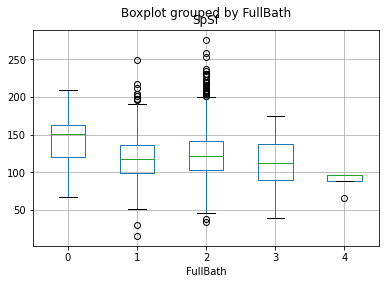

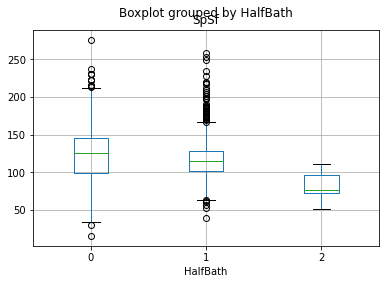

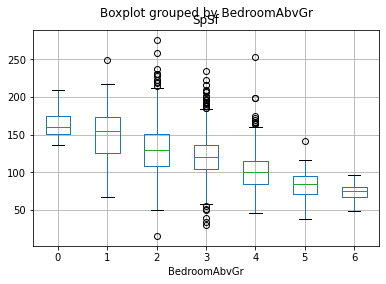

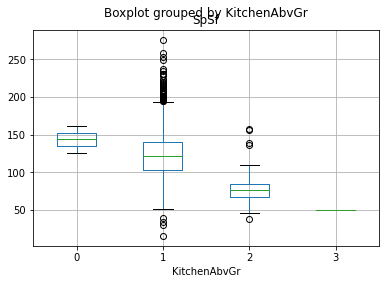

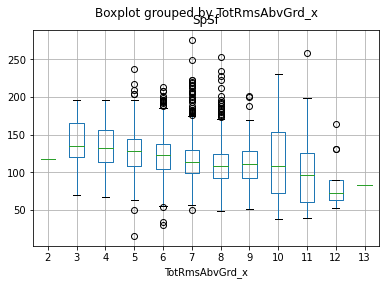

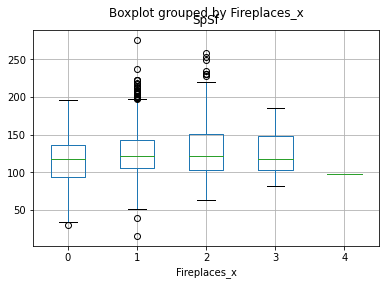

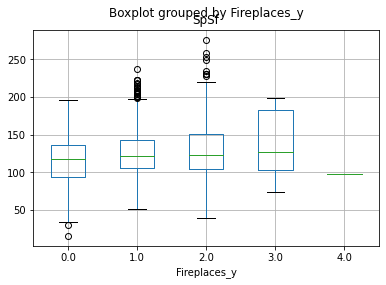

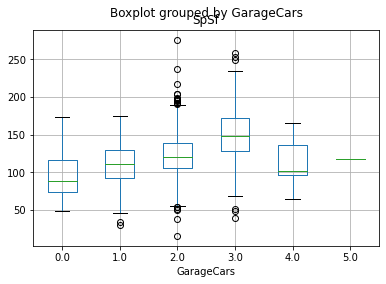

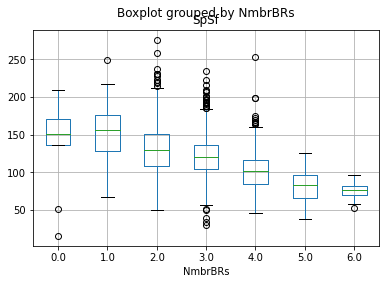

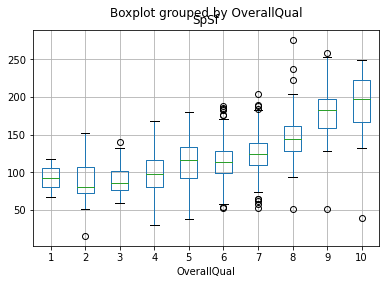

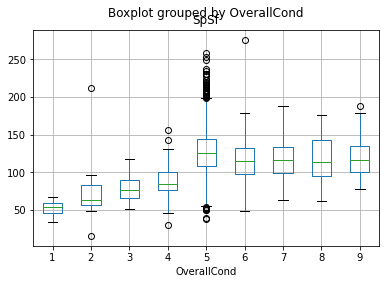

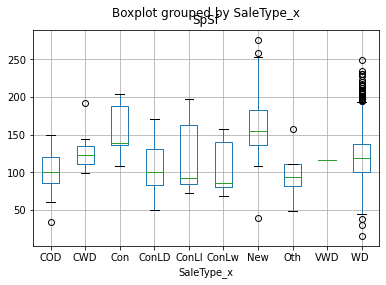

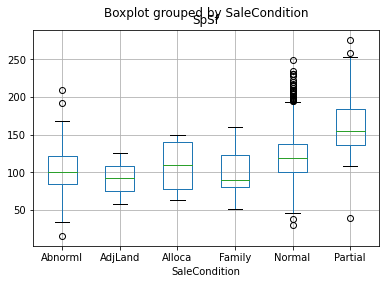

In [44]:
for col in clean_categ + clean_nonlin + clean_ordinal:
    both.boxplot(column='SpSf', by=col)

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


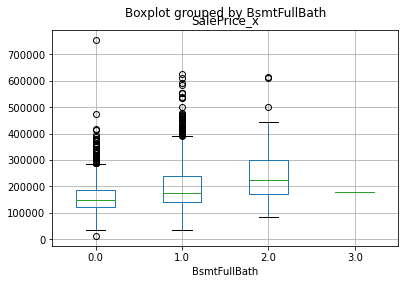

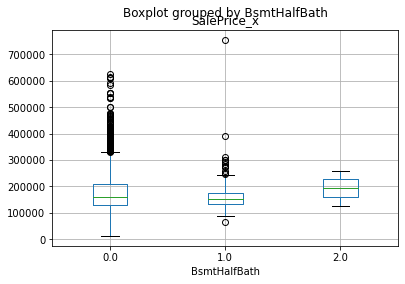

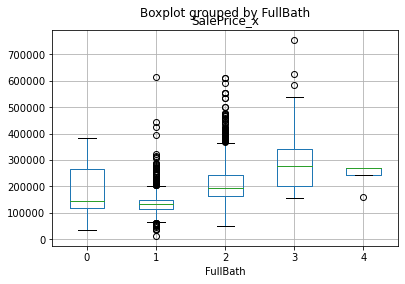

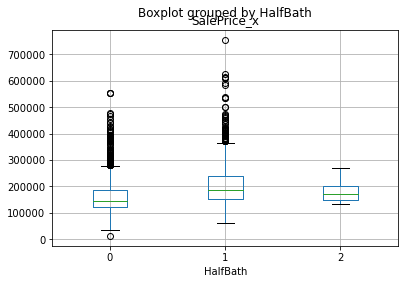

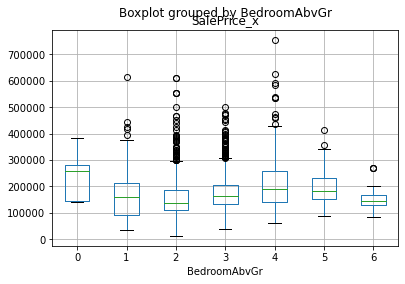

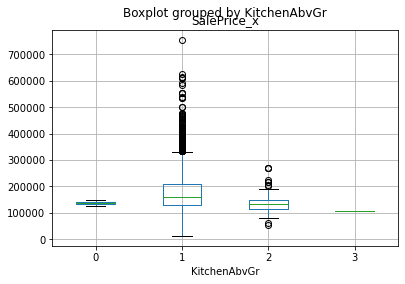

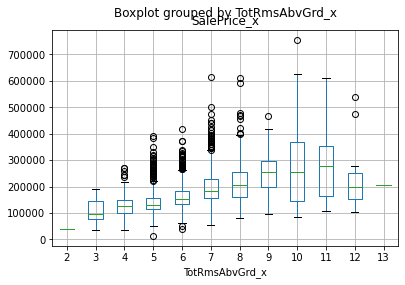

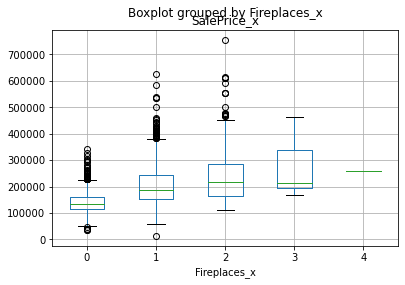

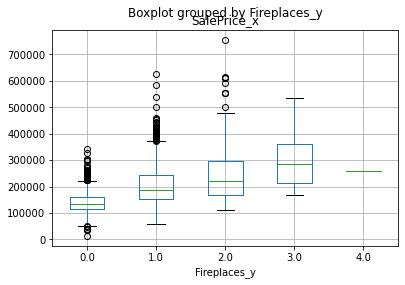

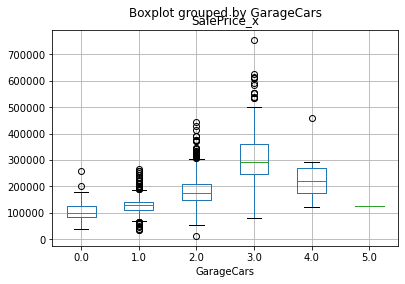

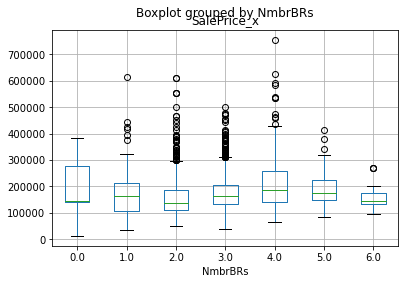

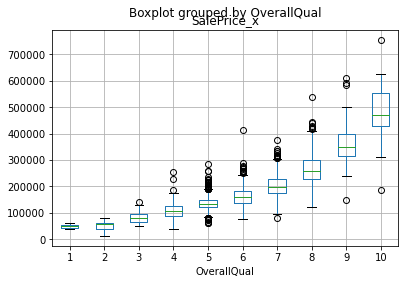

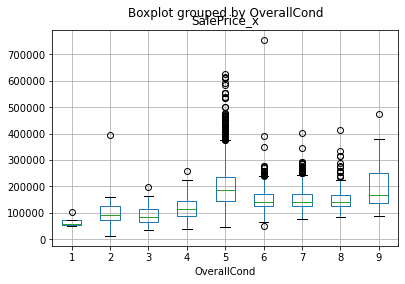

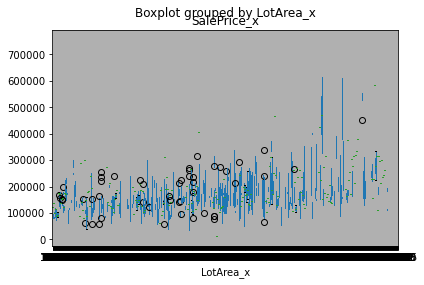

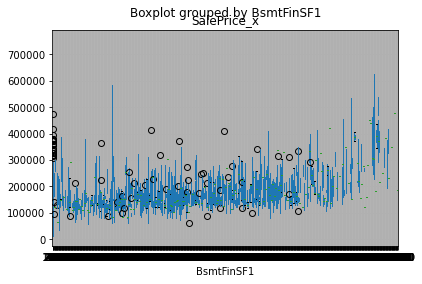

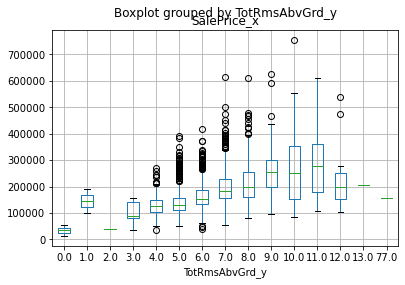

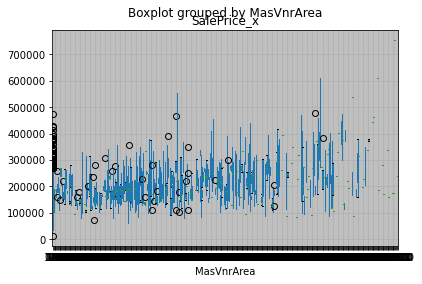

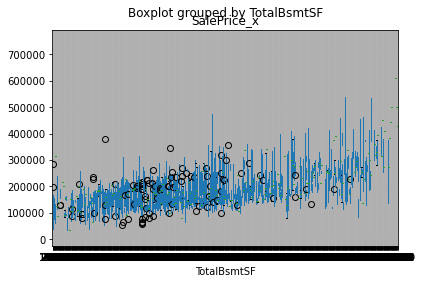

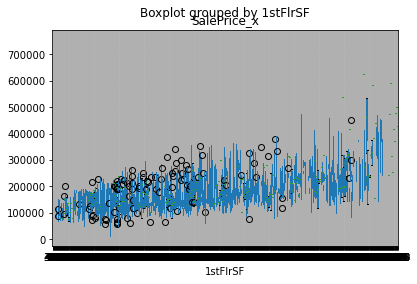

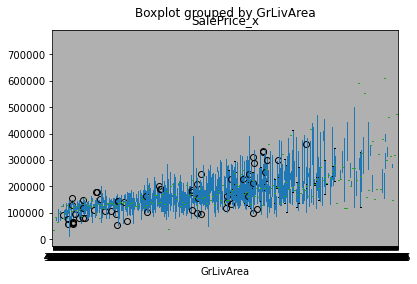

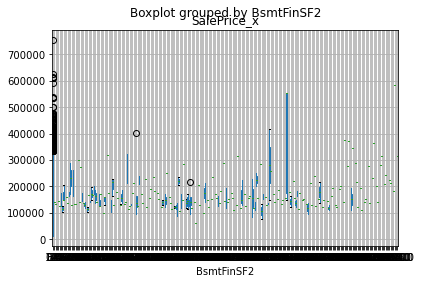

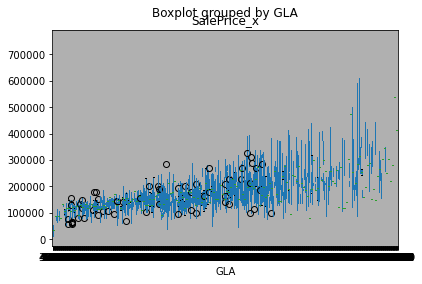

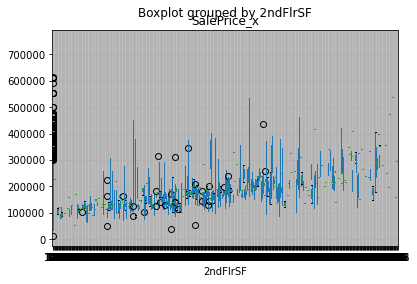

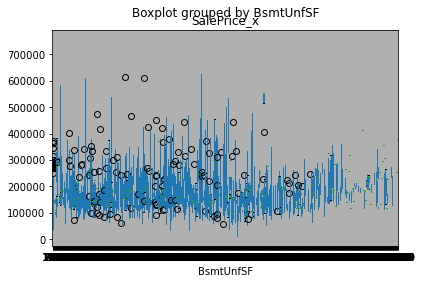

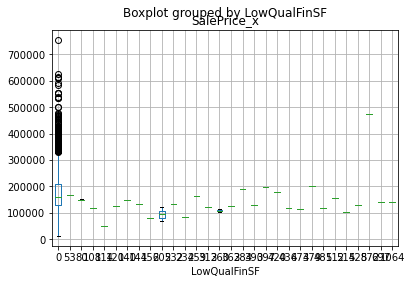

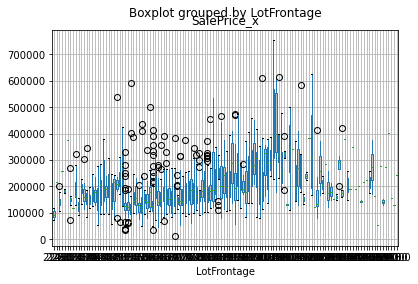

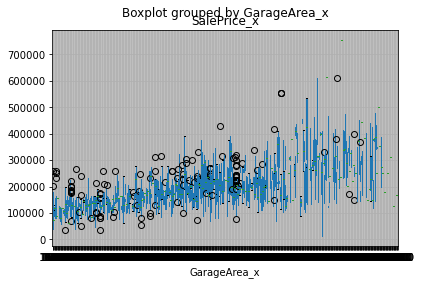

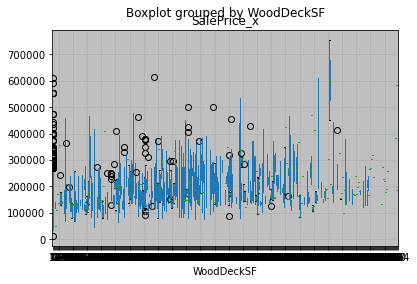

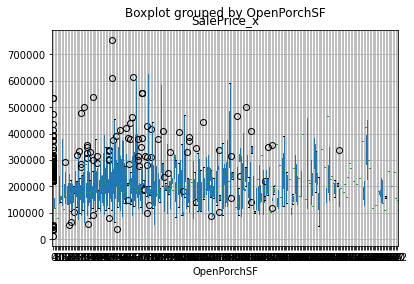

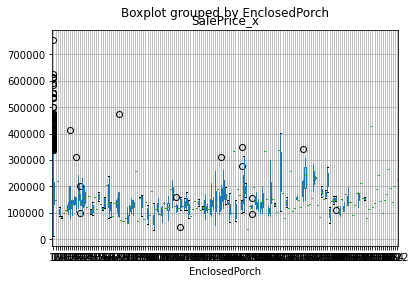

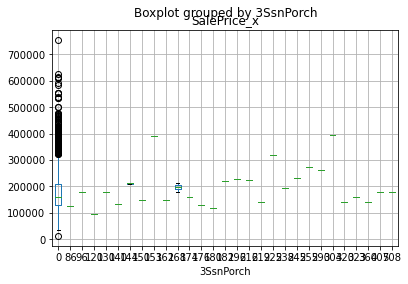

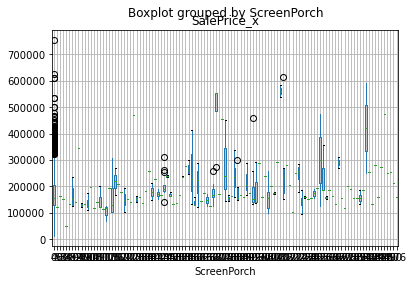

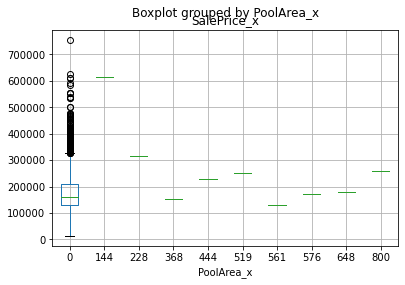

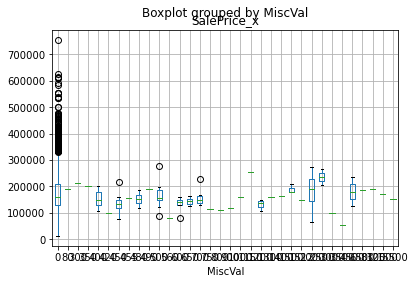

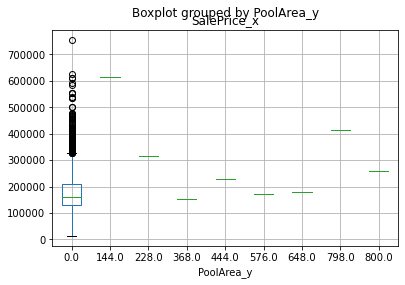

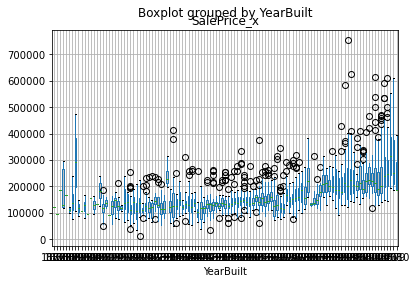

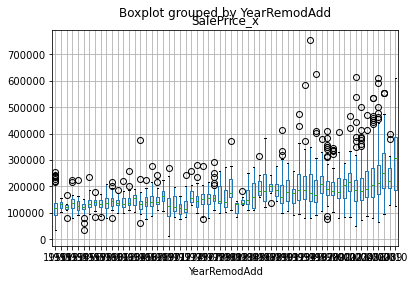

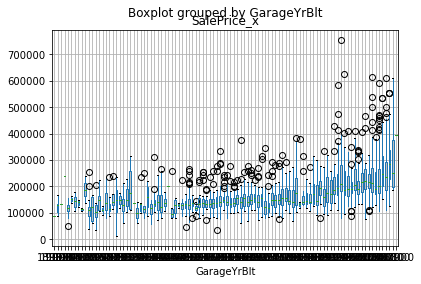

In [48]:
for col in clean_categ + clean_nonlin + clean_ordinal:
    both.boxplot(column='SalePrice_x', by=col)

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


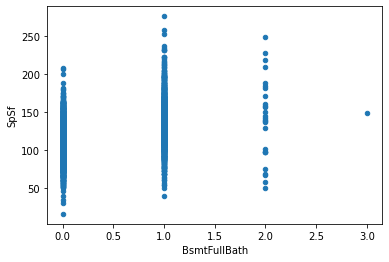

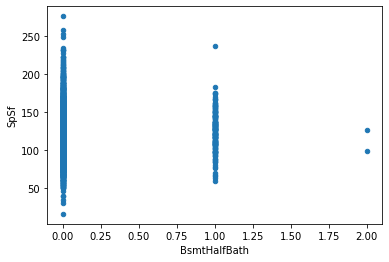

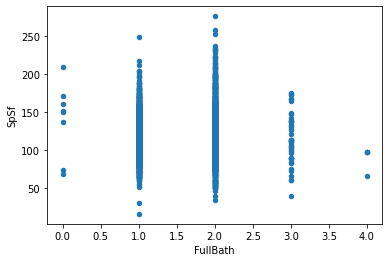

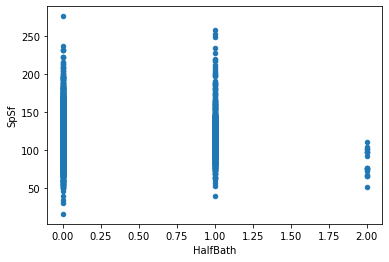

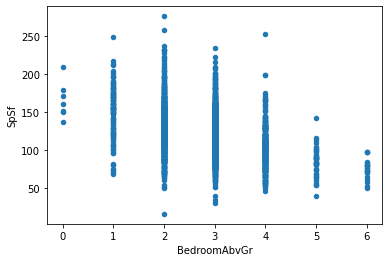

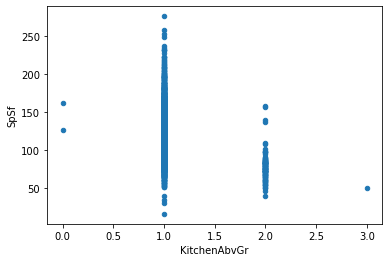

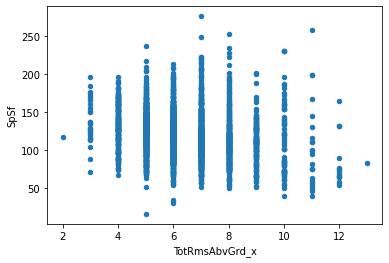

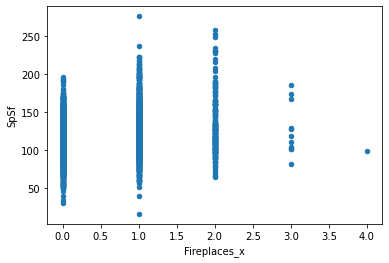

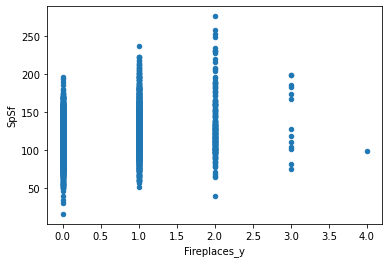

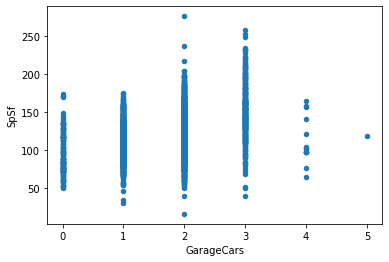

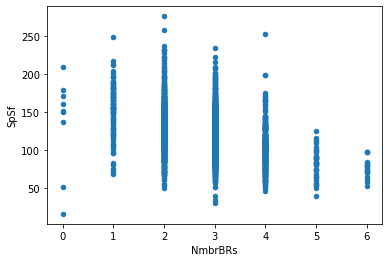

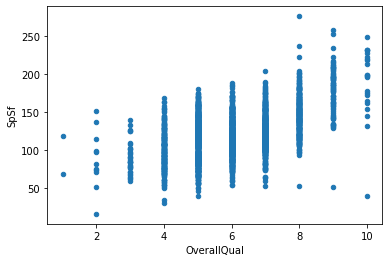

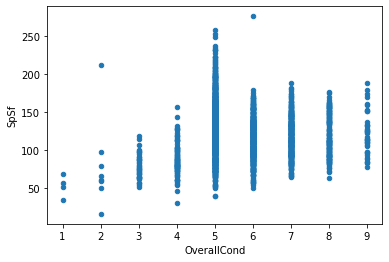

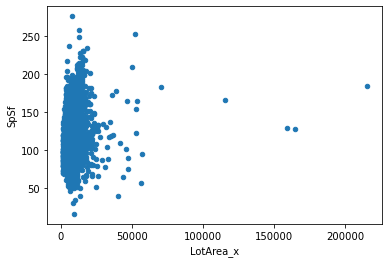

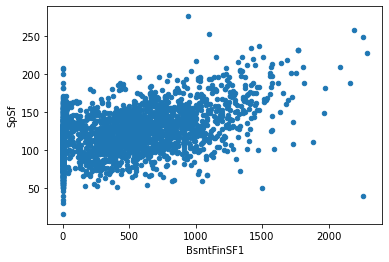

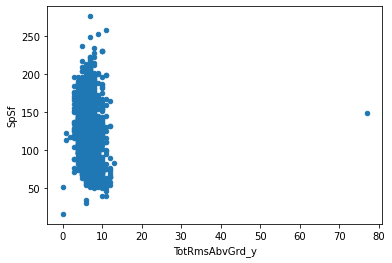

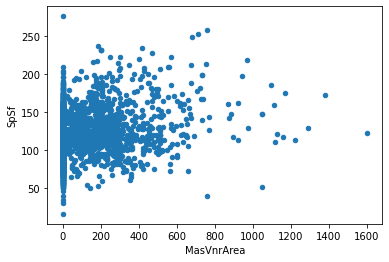

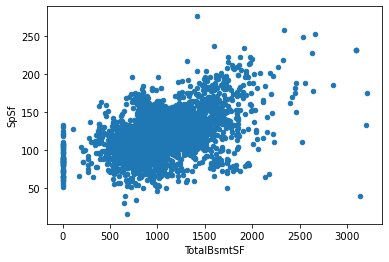

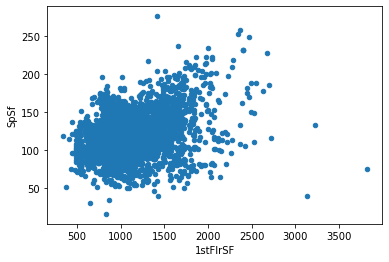

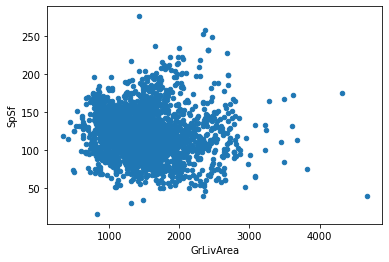

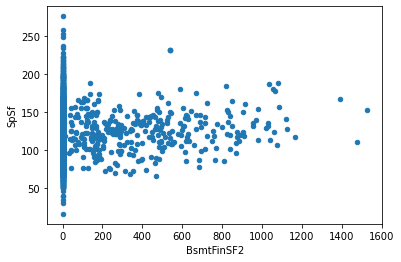

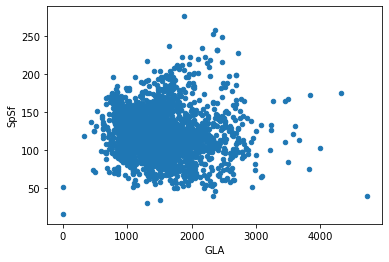

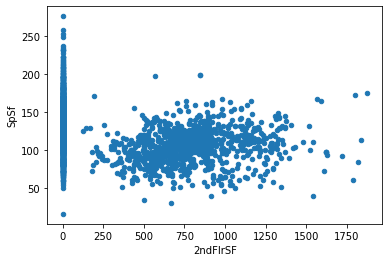

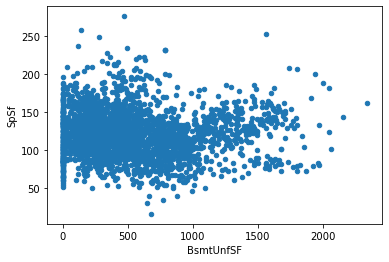

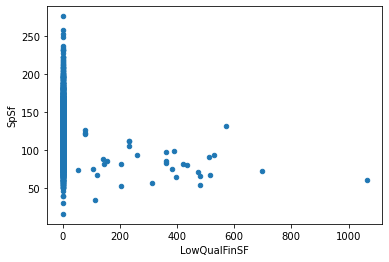

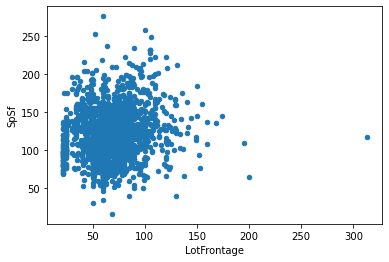

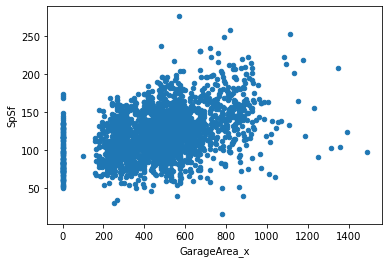

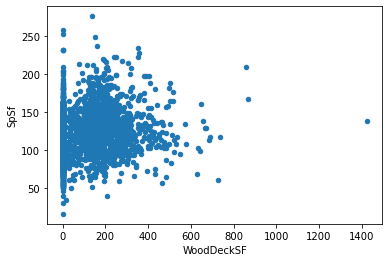

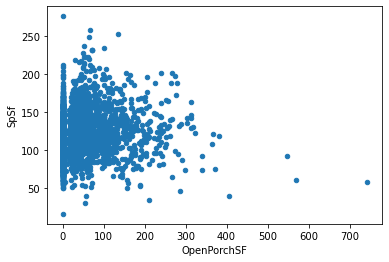

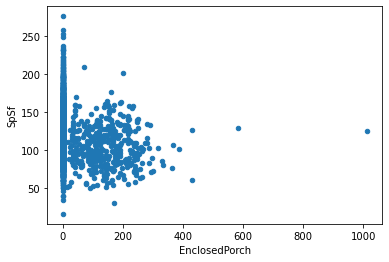

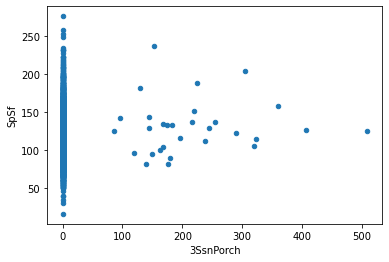

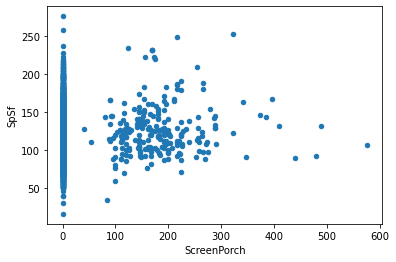

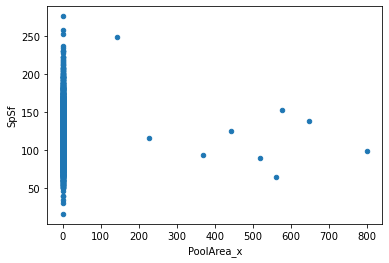

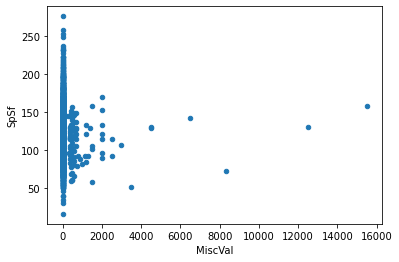

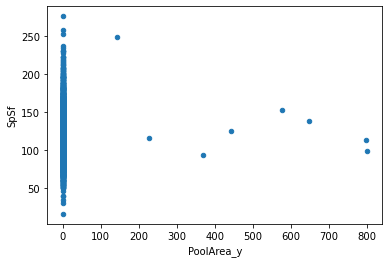

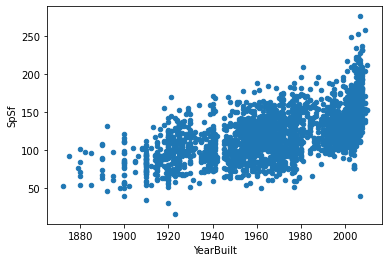

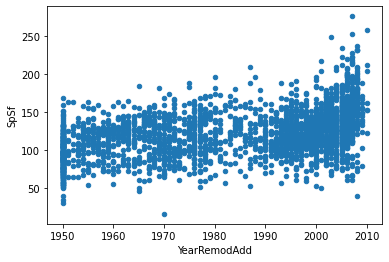

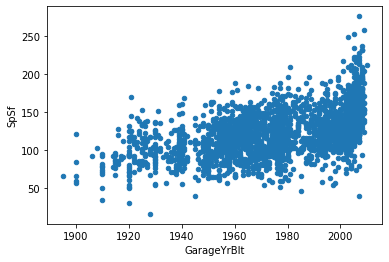

In [49]:
for col_nm in numers:
    both.plot.scatter(x=col_nm,y='SpSf')

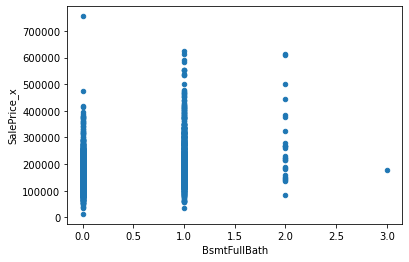

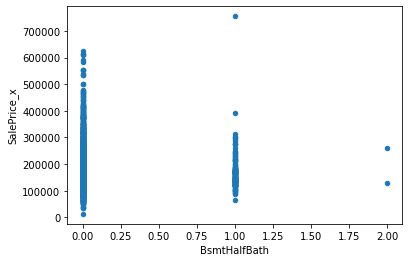

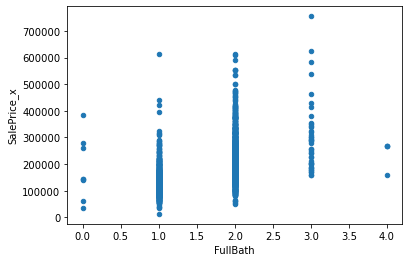

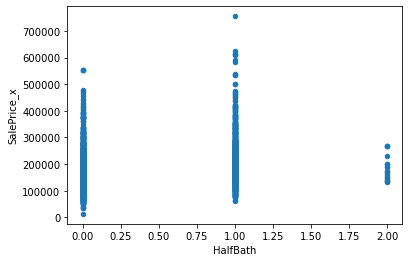

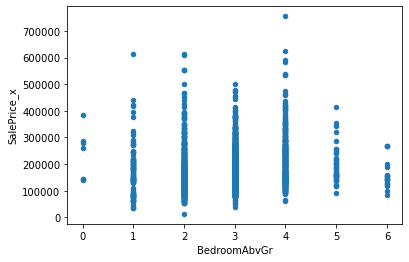

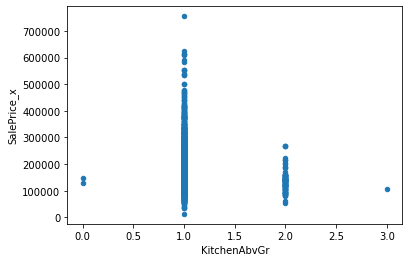

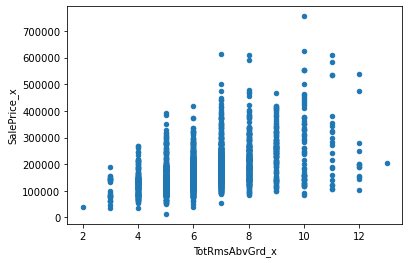

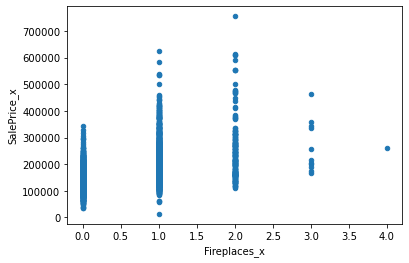

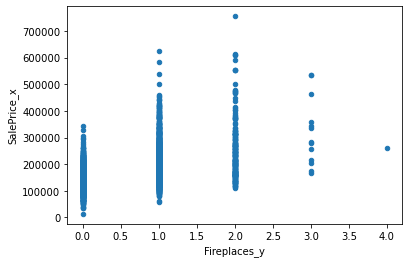

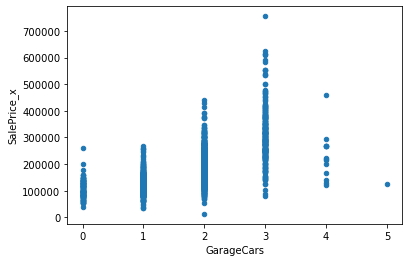

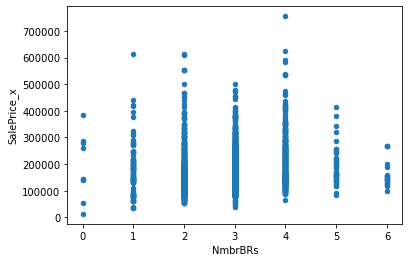

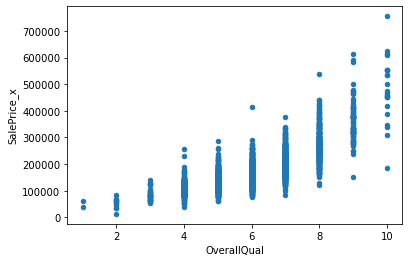

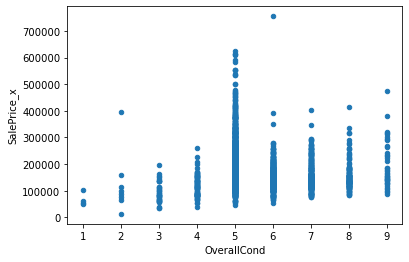

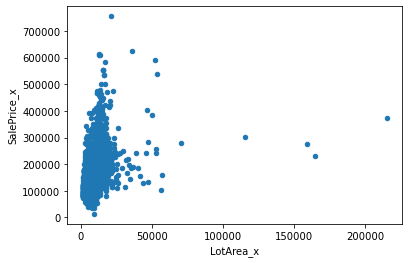

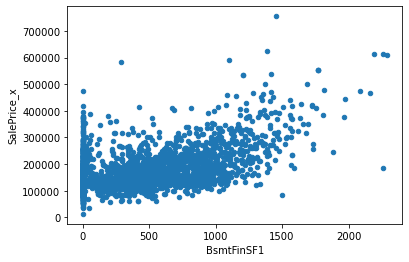

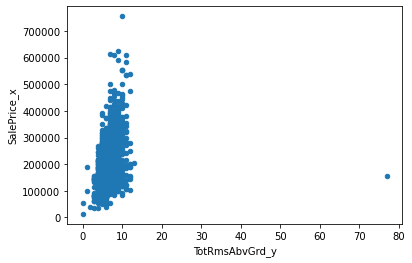

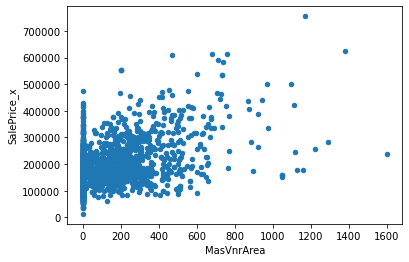

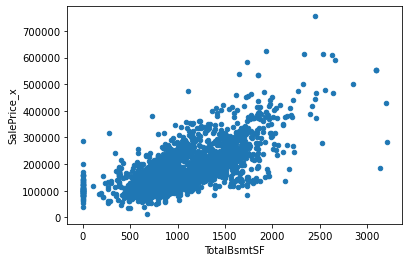

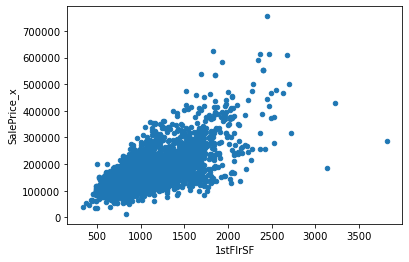

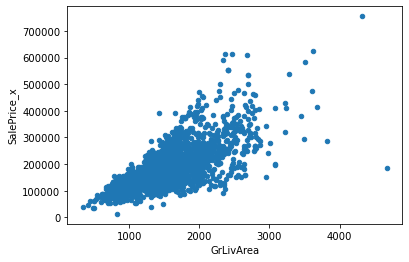

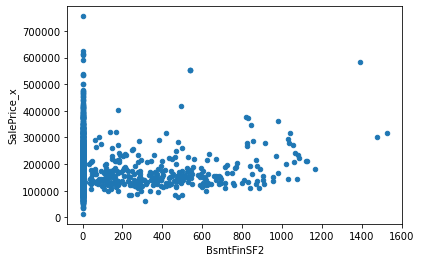

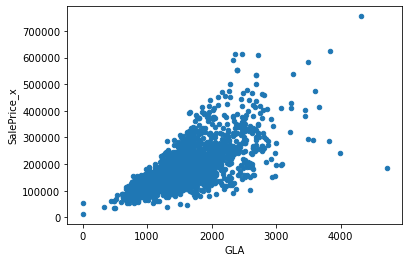

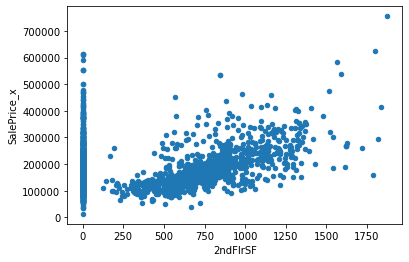

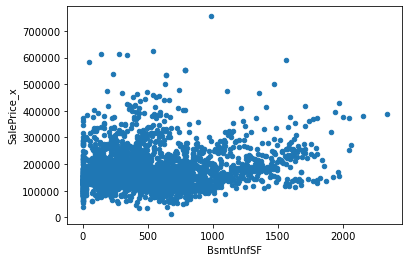

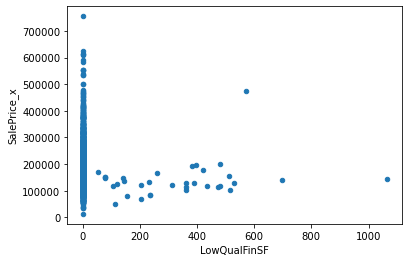

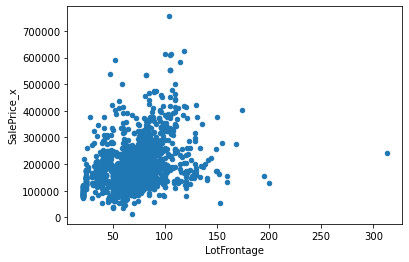

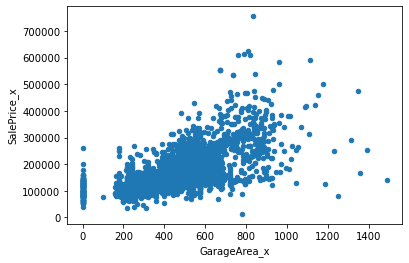

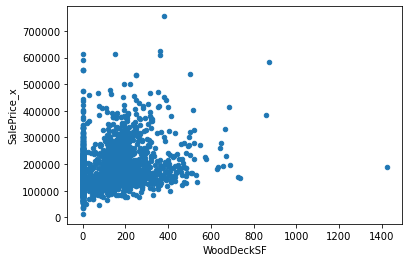

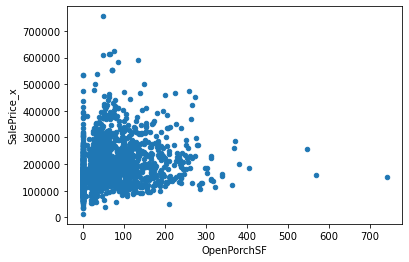

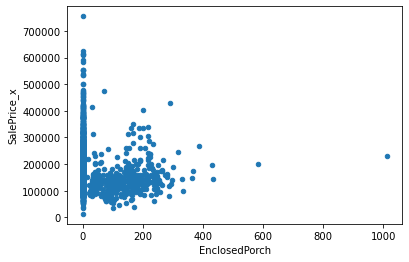

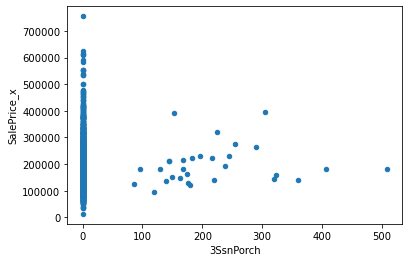

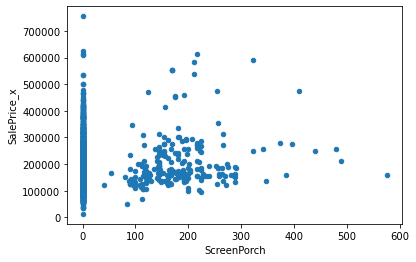

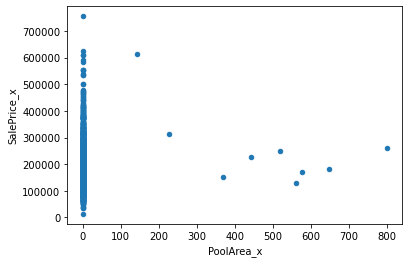

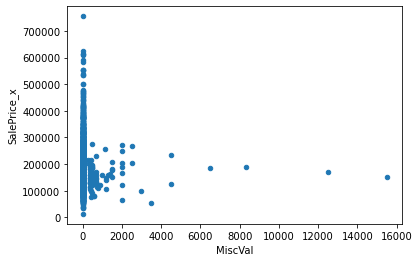

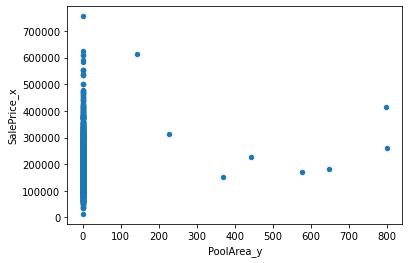

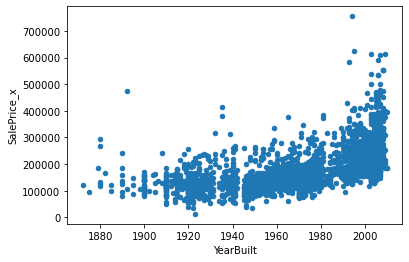

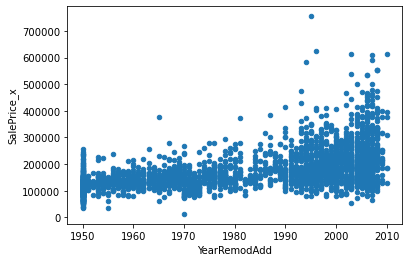

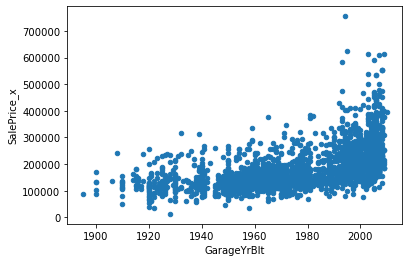

In [50]:
for col_nm in numers:
    both.plot.scatter(x=col_nm,y='SalePrice_x')

In [266]:
(9/2580)

0.0034883720930232558

In [11]:
choices = ['chi2', 'f_test', 'mutual_info']

In [263]:
numerical = both[numers].copy()
numerical#.fillna(0,inplace=True)
numerical.isnull().any().sum()

16

In [96]:
num_cols = list(numerical.columns)
drop_these=['Fireplaces_y','PoolArea_x','MiscVal','PoolArea_y']
num_to_dum = ['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd_x','Fireplaces_x','GarageCars','NmbrBRs','OverallQual','OverallCond']
as_is = list(set(num_cols) - set(drop_these) - set(num_to_dum))


In [14]:
# df['DataFrame Column'] = df['DataFrame Column'].replace(np.nan, 0) # format for replacemnt of nulls 

In [93]:
numerical.isnull().any().sum()

0

In [122]:
both[num_to_dum] ## mutual_info_classif
both[as_is] ## f_classif

len(both[as_is].columns)  #22
len(both[num_to_dum].columns) #12

initial_X_lins = both[as_is].replace(np.nan,0)
second_X_test = both[num_to_dum].replace(np.nan,0)

y1 = both['SalePrice_x']
y2 = both['SpSf']

10


In [153]:
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression
linselector1 = SelectKBest(f_classif, k='all').fit(initial_X_lins,y1)
linear_ttl = sorted(list(zip(linselector1.pvalues_,initial_X_lins.columns)))
linear_ttl_scr = sorted(list(zip(linselector1.scores_,initial_X_lins.columns)),reverse=True)
linselector2 = SelectKBest(f_classif, k='all').fit(initial_X_lins,y2)
linear_psf = sorted(list(zip(linselector2.pvalues_,initial_X_lins.columns)))
linear_psf_scr = sorted(list(zip(linselector2.scores_,initial_X_lins.columns)),reverse=True)

In [154]:
linselector3 = SelectKBest(f_classif, k='all').fit(second_X_test,y1)
nonlinear_ttl = sorted(list(zip(linselector3.pvalues_,second_X_test.columns)))
nonlinear_ttl_scr = sorted(list(zip(linselector3.scores_,second_X_test.columns)),reverse=True)
linselector4 = SelectKBest(f_classif, k='all').fit(second_X_test,y2)
nonlinear_psf = sorted(list(zip(linselector4.pvalues_,second_X_test.columns)))
nonlinear_psf_scr = sorted(list(zip(linselector4.scores_,second_X_test.columns)),reverse=True)

In [185]:
## P-values
# linear_ttl
linear_feats_sig=[]
linear_psf
for elm in linear_psf:
    if elm[0]<.05:
        linear_feats_sig.append(elm[1])
# nonlinear_ttl

nonlinear_psf
nonlinear_feats_sig=[]
for elem in nonlinear_psf:
    if elem[0]<.05:
        nonlinear_feats_sig.append(elem[1])
linear_feats_sig + nonlinear_feats_sig

['LowQualFinSF',
 'LotArea_x',
 'ScreenPorch',
 'TotalBsmtSF',
 '1stFlrSF',
 'TotRmsAbvGrd_y',
 'BsmtFinSF1',
 'BsmtUnfSF',
 '2ndFlrSF',
 'YearBuilt',
 'MasVnrArea',
 'GrLivArea',
 'WoodDeckSF',
 'GarageArea_x',
 'YearRemodAdd',
 'LotFrontage',
 'GLA',
 'GarageYrBlt',
 'OpenPorchSF',
 'KitchenAbvGr',
 'TotRmsAbvGrd_x',
 'BedroomAbvGr',
 'HalfBath',
 'OverallQual',
 'GarageCars',
 'BsmtFullBath',
 'OverallCond',
 'Fireplaces_x',
 'NmbrBRs',
 'FullBath',
 'BsmtHalfBath']

In [156]:
linear_ttl_scr
linear_psf_scr
nonlinear_ttl_scr
nonlinear_psf_scr

[(4.671927814507942, 'KitchenAbvGr'),
 (3.7665934882703733, 'TotRmsAbvGrd_x'),
 (3.5034892169832568, 'BedroomAbvGr'),
 (2.6127565463735403, 'HalfBath'),
 (2.585538812981732, 'OverallQual'),
 (2.433885383260618, 'GarageCars'),
 (2.3027532359223626, 'BsmtFullBath'),
 (2.216796579211019, 'OverallCond'),
 (2.1625455303074594, 'Fireplaces_x'),
 (2.1243151591702176, 'NmbrBRs'),
 (1.9319395771022405, 'FullBath'),
 (1.2774845975819122, 'BsmtHalfBath')]

In [22]:
to_dum = clean_ordinal
X2 = pd.get_dummies(both[to_dum],drop_first=True)

In [161]:
# from sklearn.feature_selection import chi2
# from sklearn.feature_selection import SelectKBest
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(X2,y)

# selector = SelectKBest(chi2, k=50).fit(X2,y)
# x_new = selector.transform(X2) # not needed to get the score
# selector.scores_
# lst_sig = sorted(list(zip(selector.pvalues_, X2.columns)))
# sig = [x[0]<.05 for x in lst_sig]
# sig_lst=[]
# def is_sig(lst):
#     for elem in lst:
#         if elem[0]<.05:
#             sig_lst.append(elem)
# is_sig(lst_sig)

# sig_lst

clean_df =  both[categ+ nonlin + lin + date_tm + numers] ## 65 nulls
# clean_df = clean_df.fillna(0)
y1 = both['SalePrice_x']
y2 = both['SpSf']
pd.concat()

65

In [236]:
from sklearn.model_selection import train_test_split
# clean_df_test =  
df1 = both[nonlin + lin + date_tm + numers]
df2 = pd.get_dummies(both[categ],drop_first=True)
df3 = pd.concat([df1,df2],axis=1)
df3 = df3.fillna(0)
X1_train, X1_test, y1_train, y1_test = train_test_split(df3, y1, test_size=.2)
# clean_df_test.fillna(0)

In [237]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X1_train,y1_train)
lm.score(X1_train,y1_train)

0.9459888402286918

In [243]:
df4 = both[linear_feats_sig + nonlinear_feats_sig].fillna(0)
x2_tr, x2_te, y2_tr, y2_te = train_test_split(df4, y1, test_size = .2)
lm.fit(x2_tr,y2_tr)
lm.score(x2_tr,y2_tr)
lm.score(x2_te,y2_te)
# X2_train, X2_test, y2_train, y2_test = train_test_split(df3, y1, test_size=.2)

0.8612730283104832

In [230]:
# both[clean_X].replace(np.nan,0,inplace=True)
# both[clean_X] = both[clean_X].replace(np.nan,0)

In [406]:
cleaned = pd.read_csv('cleaned/Ames_Housing_Price_Data_CLEAN.csv')

In [407]:
cleaned.dtypes[cleaned.dtypes=='int64']

Unnamed: 0       int64
PID              int64
GrLivArea        int64
SalePrice        int64
MSSubClass       int64
LotArea          int64
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
1stFlrSF         int64
2ndFlrSF         int64
LowQualFinSF     int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
TotRmsAbvGrd     int64
Fireplaces       int64
WoodDeckSF       int64
OpenPorchSF      int64
EnclosedPorch    int64
3SsnPorch        int64
ScreenPorch      int64
PoolArea         int64
MiscVal          int64
MoSold           int64
YrSold           int64
dtype: object

In [384]:
cla['val'].sort_values(ascending=False).head(27)

PoolQC          2545
MiscFeature     2462
Alley           2385
Fence           2033
FireplaceQu     1230
LotFrontage      457
GarageFinish     126
GarageQual       126
GarageCond       126
GarageYrBlt      126
GarageType       124
BsmtExposure      68
BsmtFinType2      67
BsmtFinType1      66
BsmtCond          66
BsmtQual          66
MasVnrArea        14
MasVnrType        14
BsmtHalfBath       2
BsmtFullBath       2
Electrical         1
TotalBsmtSF        1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
GarageCars         1
GarageArea         1
Name: val, dtype: int64

In [393]:
nmers = ['GrLivArea','SalePrice','MSSubClass','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','1stFlrSF','2ndFlrSF','LowQualFinSF','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']

In [405]:
cleaned[nmers].isnull().sum()   ## 0's across the board
cleaned['$/SF']=cleaned['SalePrice'] / cleaned['GrLivArea']

In [400]:
cleaned

Unnamed: 0        PID  GrLivArea  SalePrice  MSSubClass MSZoning  \
0              1  909176150        856     126000          30       RL   
1              1  907250050       2000     305900          20       RL   
2              1  909276070       1717     194000          50       RL   
3              2  905476230       1049     139500         120       RL   
4              2  909425140       1839     257500          20       RL   
...          ...        ...        ...        ...         ...      ...   
2548         996  907290250        848     145000         120       RM   
2549         997  528480150       1576     197000          60       FV   
2550         998  534427010       1728      84900          90       RL   
2551         999  905106140       1352     158000          60       RL   
2552        1000  914452120        912     156000          85       RL   

      LotFrontage  LotArea Street Alley  ... PoolArea PoolQC  Fence  \
0             NaN     7890   Pave   NaN  ...        0    NaN    NaN   
1            80.0    10386   Pave   NaN  ...        0    NaN    NaN   
2            80.0    12400   Pave   NaN  ...        0    NaN    NaN   
3            42.0     4235   Pave   NaN  ...        0    NaN    NaN   
4           110.0    14442   Pave   NaN  ...        0    NaN    NaN   
...           ...      ...    ...   ...  ...      ...    ...    ...   
2548          NaN     4426   Pave   NaN  ...        0    NaN    NaN   
2549         65.0     8125   Pave   NaN  ...        0    NaN    NaN   
2550         98.0    13260   Pave   NaN  ...        0    NaN    NaN   
2551         80.0     9364   Pave   NaN  ...        0    NaN  MnPrv   
2552          NaN     7540   Pave   NaN  ...        0    NaN  MnPrv   

     MiscFeature MiscVal MoSold YrSold SaleType SaleCondition        $/SF  
0            NaN       0      3   2010      WD         Normal  147.196262  
1            NaN       0      7   2007      WD         Normal  152.950000  
2            NaN       0      2   2006      WD         Normal  112.987769  
3            NaN       0      2   2009      WD         Normal  132.983794  
4            NaN       0      6   2007      WD         Normal  140.021751  
...          ...     ...    ...    ...      ...           ...         ...  
2548         NaN       0      2   2008      WD         Normal  170.990566  
2549         NaN       0      8   2006      New       Partial  125.000000  
2550         NaN       0      1   2010      Oth       Abnorml   49.131944  
2551         NaN       0      3   2010      WD         Normal  116.863905  
2552         NaN       0      6   2007      WD         Normal  171.052632  

[2553 rows x 83 columns]

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


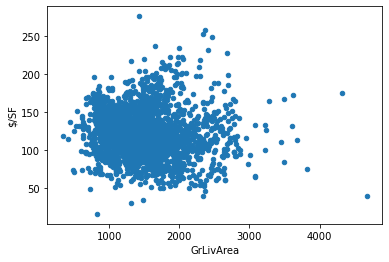

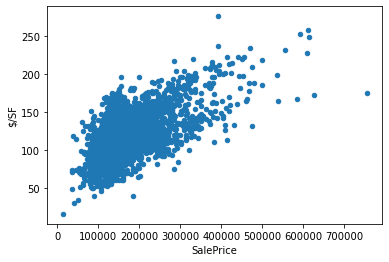

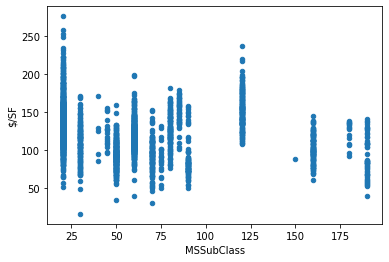

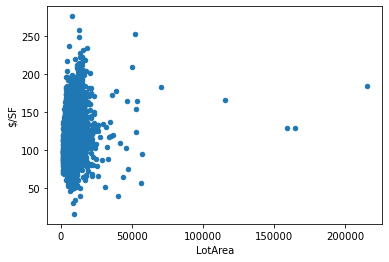

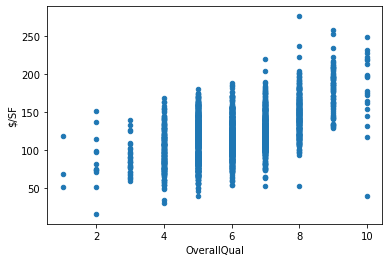

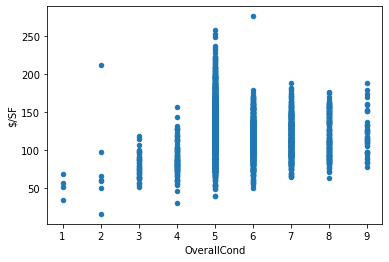

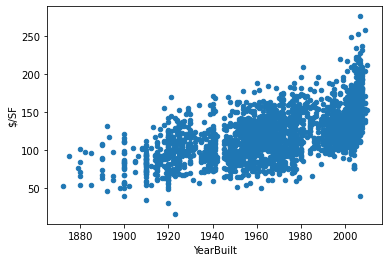

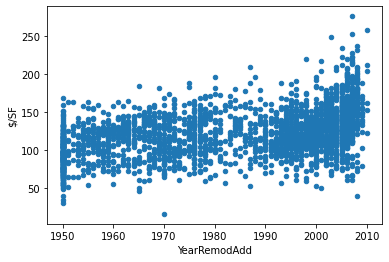

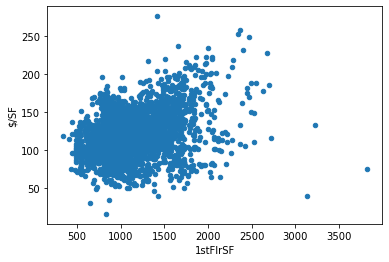

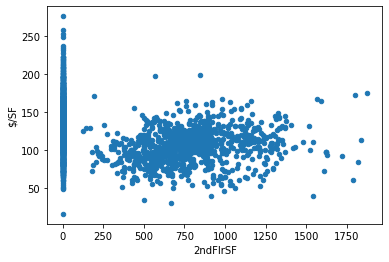

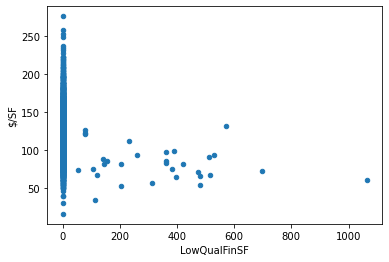

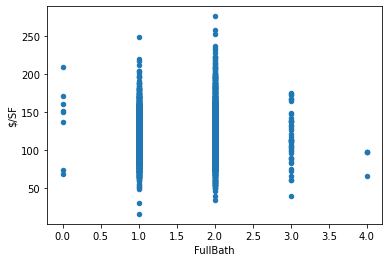

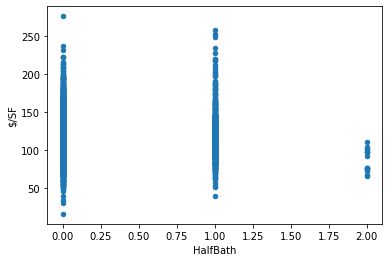

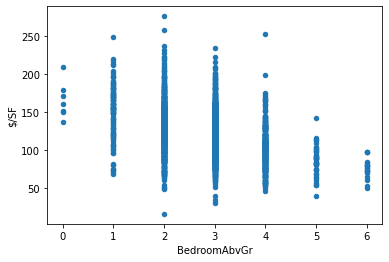

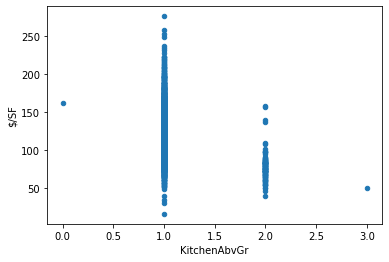

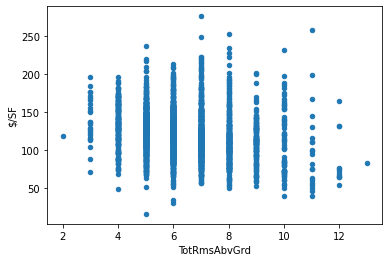

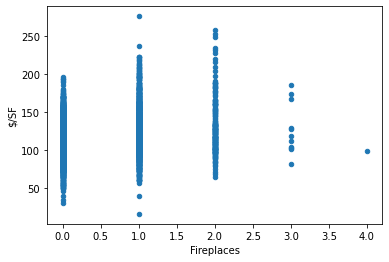

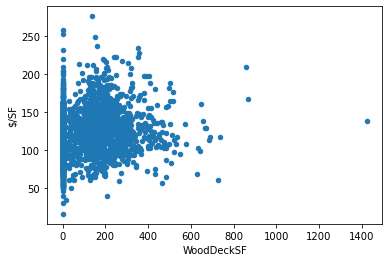

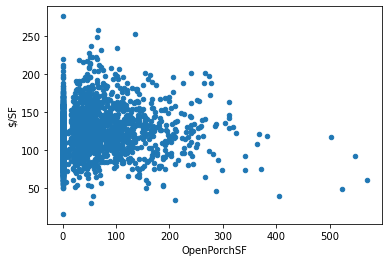

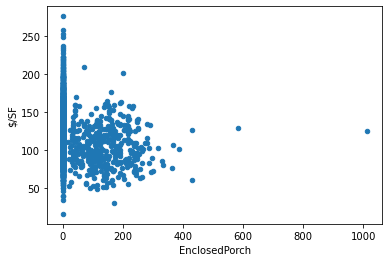

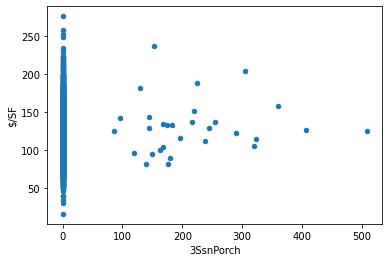

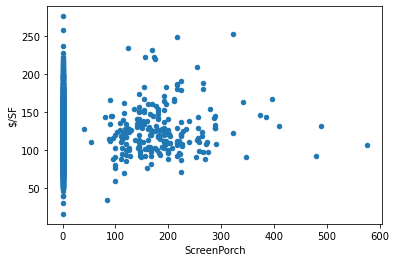

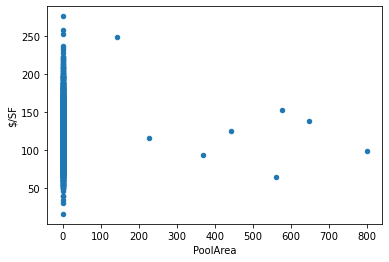

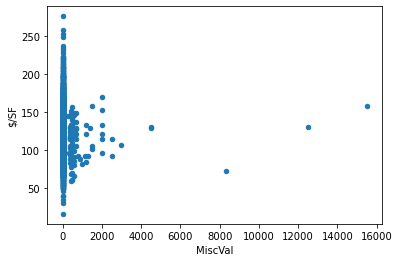

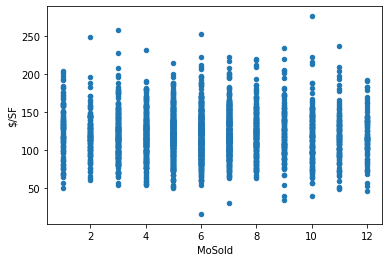

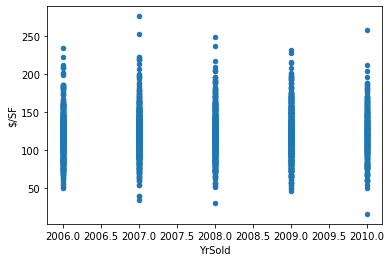

In [402]:
for col_nm in nmers:
    cleaned.plot.scatter(x=col_nm,y='$/SF')

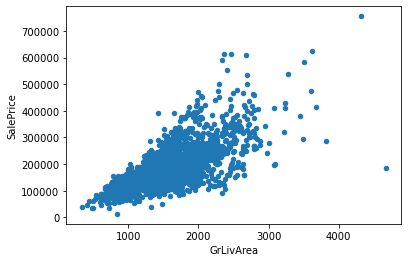

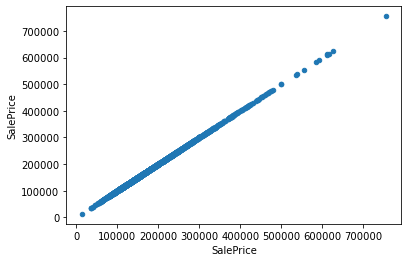

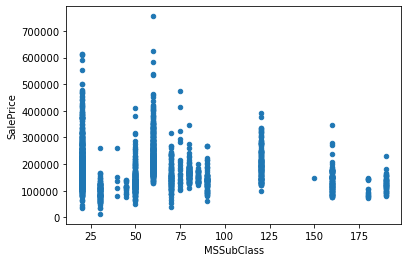

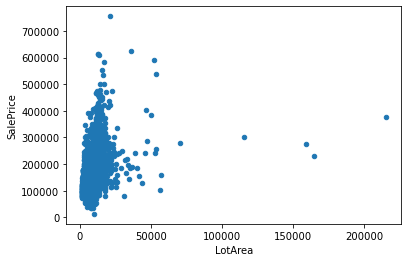

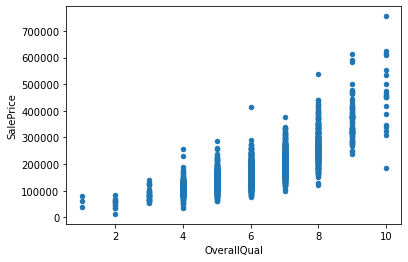

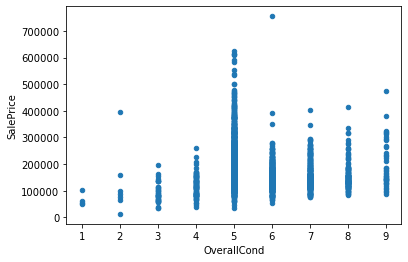

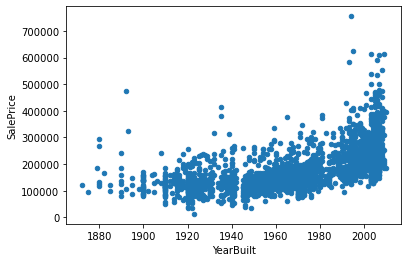

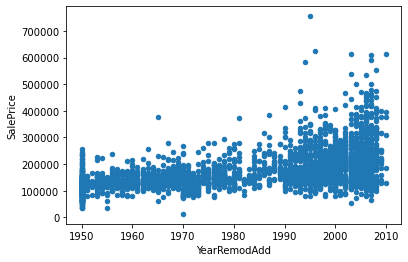

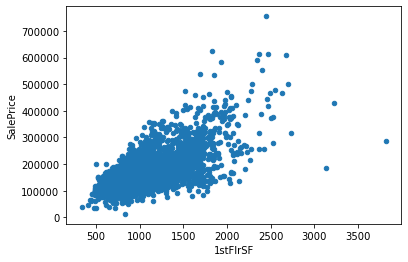

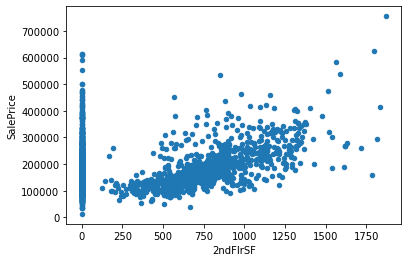

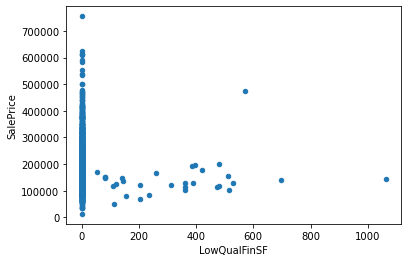

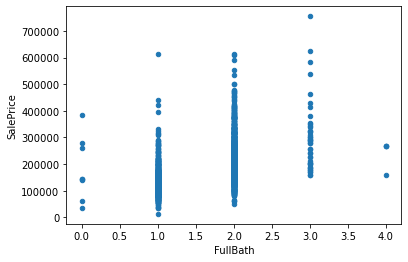

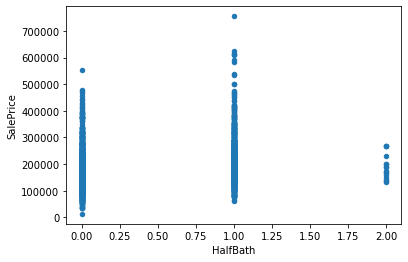

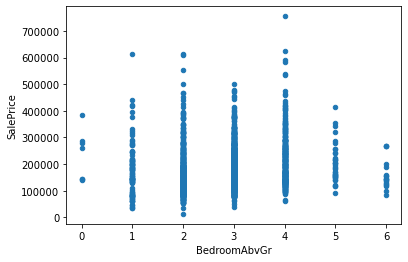

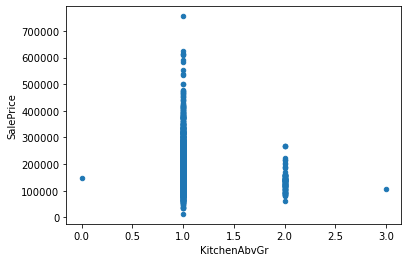

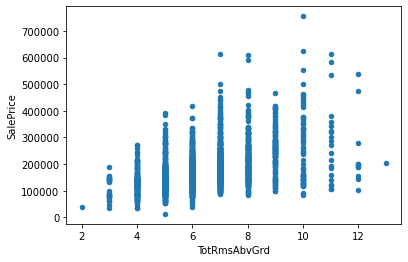

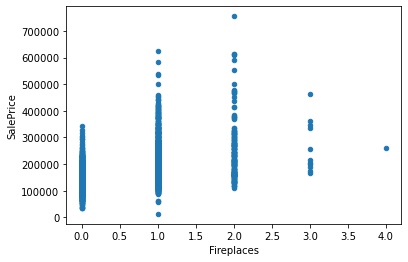

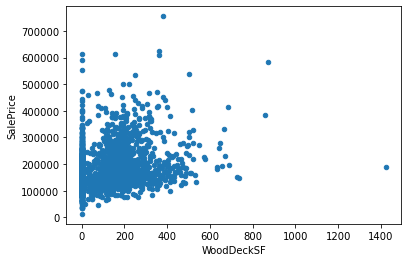

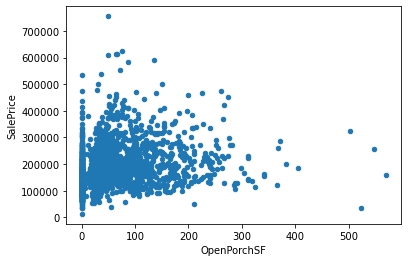

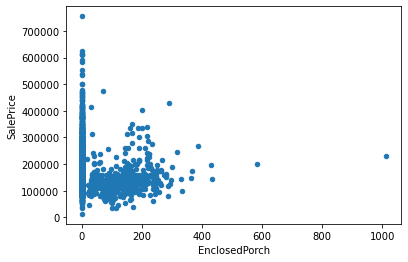

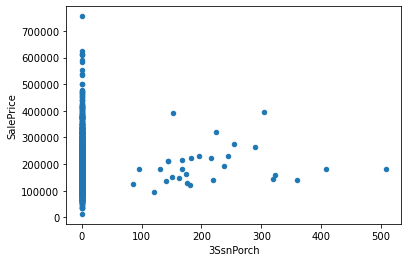

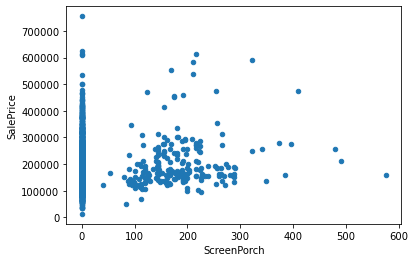

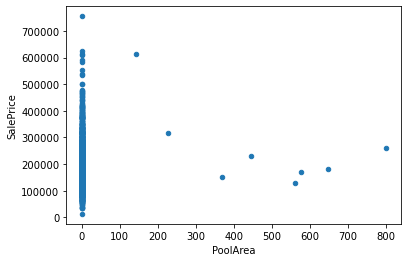

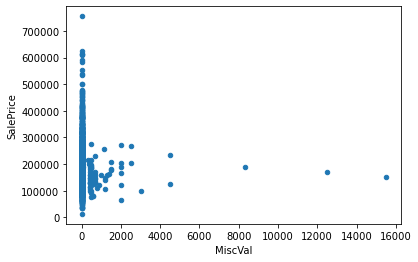

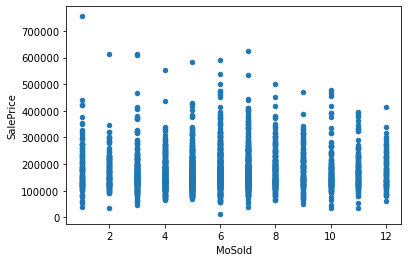

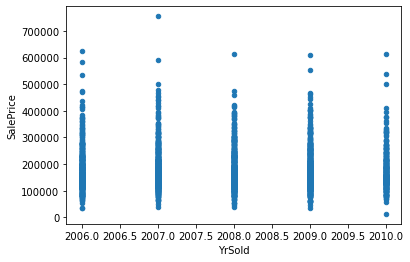

In [403]:
for col_nm in nmers:
    cleaned.plot.scatter(x=col_nm,y='SalePrice')